<a href="https://colab.research.google.com/github/aaronjoel/DeepLearningTutorials/blob/master/Pytorch2_Linear_Logistic_Regression_For_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import trange

In [ ]:
## Loading the data
npzfile = np.load('toy_data_two_moon.npz')

npzfile

NpzFile 'toy_data_two_moon.npz' with keys: arr_0, arr_1, arr_2, arr_3

In [ ]:
# The compressed NumPy file is split into 4 parts
# Let's convert them to PyTorch Float Tensors
x_train = torch.FloatTensor(npzfile['arr_0'])
y_train = torch.FloatTensor(npzfile['arr_2'])

# Test inputs and target outputs
x_test = torch.FloatTensor(npzfile['arr_1'])
y_test = torch.FloatTensor(npzfile['arr_3'])

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([600, 2]),
 torch.Size([600, 1]),
 torch.Size([400, 2]),
 torch.Size([400, 1]))

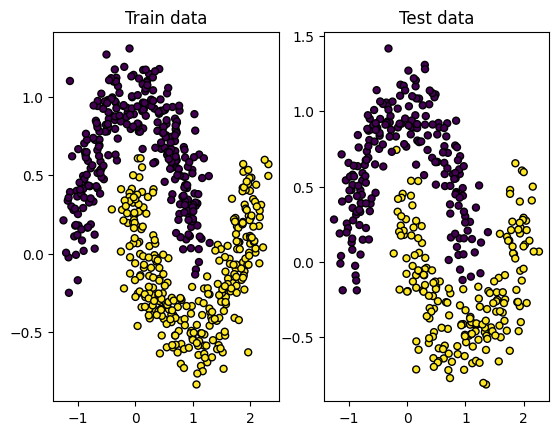

In [ ]:
# Let's see what the data looks like
plt.subplot(121)
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train[:, 0], s=25, edgecolor='k')
plt.title("Train data")
plt.subplot(122)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test[:, 0], s=25, edgecolor='k')
plt.title("Test data");

In [ ]:
# Define our linear model - 2 inputs, 1 output (bias is included in linear layer)
linear = nn.Linear(in_features=2, out_features=1)

# Define our loss function - MSE
loss_function = nn.MSELoss(reduction='mean')

# Create our GD optimizer - lr = 0.1
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
# Number of times we iterate over the dataset
max_epochs = 100

loss_log = [] # Keep track of the loss values
acc = [] # Keep track of the accuracy
for epoch in trange(max_epochs):

  # Perform a test set accuracy calculation
  with torch.no_grad():
    y_test_hat = linear(x_test)
    class_pred = (y_test_hat > 0.5).float()
    acc.append((class_pred == y_test).float().mean())

  # Perform a training step
  y_train_hat = linear(x_train)

  # Calculate loss
  loss = loss_function(y_train_hat, y_train)

  # Zero the gradient
  optimizer.zero_grad()

  # Perform backprop
  loss.backward()

  # Perform optimization step
  optimizer.step()

  # Append loss
  loss_log.append(loss.item())

print(f"Accuracy of linear model (GD): {acc[-1]*100:.2f}%")

100%|██████████| 100/100 [00:00<00:00, 866.83it/s]

Accuracy of linear model (GD): 88.50%


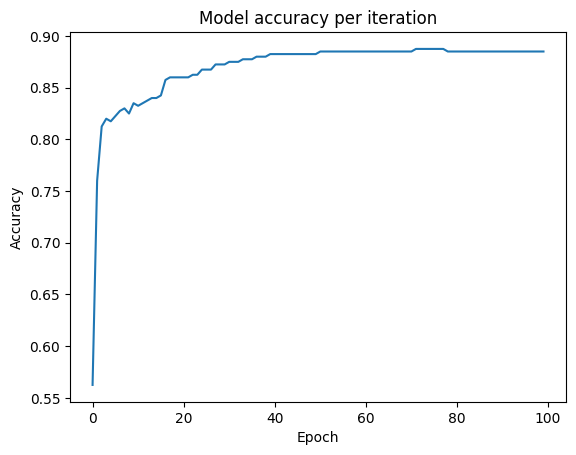

In [ ]:
plt.plot(acc)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

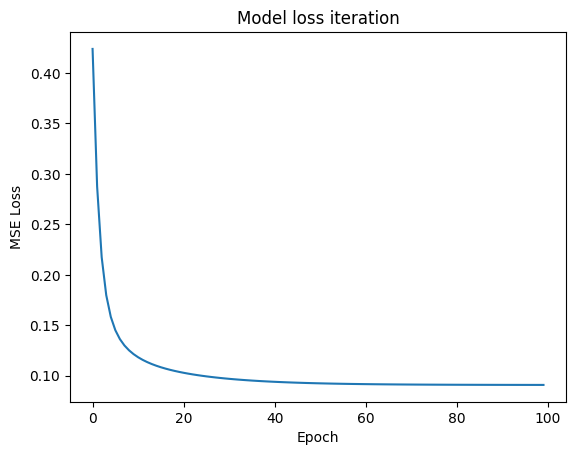

In [ ]:
plt.plot(loss_log)
plt.title("Model loss iteration")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss");

## Logistic Regression

In [ ]:
# Define our linear model - 2 inputs, 1 outputs (bias is included in linear layer)
logistic_linear = nn.Linear(in_features=2, out_features=1)

# Define our loss function - Binary Cross entropy With logits
# By using the "with logits" version Pytorch will assume the outputs given are the RAW
# model outputs without the Sigmoid (logits - log odd probabilities, it is the inverse of the sigmoid function!)
# Pytorch incorporates the Sigmoid into the loss function for numerical stability!
loss_function = nn.BCEWithLogitsLoss()

# Create our optimizer - lr = 0.1
logistic_optimizer = torch.optim.SGD(logistic_linear.parameters(), lr=0.1)

# Create our GD optimizer - lr = 0

In [ ]:
# Number of times we iterate over the dataset
max_epochs = 100

logistic_loss_log = [] # keep track of the loss values
logistic_acc = [] # keep track of the accuracy

for epoch in trange(max_epochs):
  # Perform a test set accuracy calculation
  with torch.no_grad():
    y_test_hat = logistic_linear(x_test)
    y_test_hat = torch.sigmoid(y_test_hat)
    class_pred = (y_test_hat > 0.5).float()
    logistic_acc.append((class_pred == y_test).float().mean())

  # Perform a training step
  y_train_hat = logistic_linear(x_train)

  # Calculate loss
  loss = loss_function(y_train_hat, y_train)

  # Zero the gradient
  logistic_optimizer.zero_grad()

  # Perform backprop
  loss.backward()

  # Perform optimization step
  logistic_optimizer.step()

  # Append loss
  logistic_loss_log.append(loss.item())

print(f"Accuracy of logistic model (GD): {logistic_acc[-1]*100:.2f}%")

100%|██████████| 100/100 [00:00<00:00, 570.19it/s]

Accuracy of logistic model (GD): 86.25%


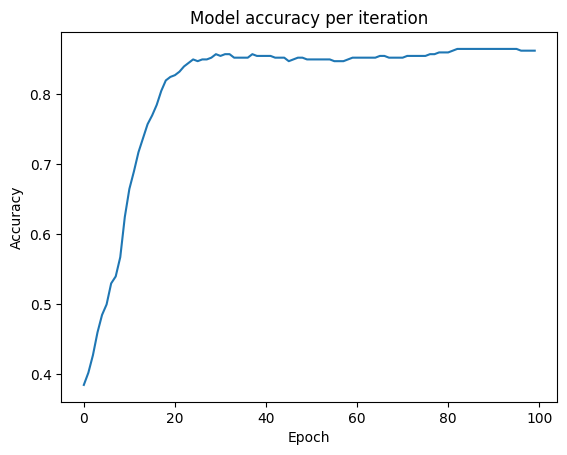

In [ ]:
plt.plot(logistic_acc)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

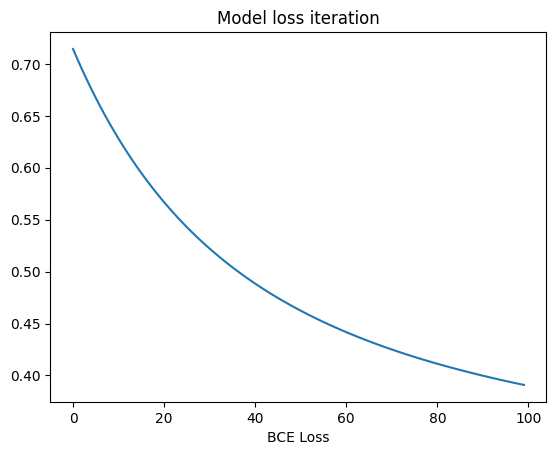

In [ ]:
plt.plot(logistic_loss_log)
plt.title("Model loss iteration")
plt.xlabel("Epoch")
plt.xlabel("BCE Loss");

In [ ]:
# Number of times we iterate over the dataset
max_epochs = 100

logistic_loss_log = [] # keep track of the loss values
logistic_acc = [] # keep track of the accuracy

for epoch in trange(max_epochs):
  # Perform a test set accuracy calculation
  with torch.no_grad():
    y_test_hat = logistic_linear(x_test)
    #y_test_hat = torch.sigmoid(y_test_hat)
    class_pred = (y_test_hat > 0.5).float()
    logistic_acc.append((class_pred == y_test).float().mean())

  # Perform a training step
  y_train_hat = logistic_linear(x_train)

  # Calculate loss
  loss = loss_function(y_train_hat, y_train)

  # Zero the gradient
  logistic_optimizer.zero_grad()

  # Perform backprop
  loss.backward()

  # Perform optimization step
  logistic_optimizer.step()

  # Append loss
  logistic_loss_log.append(loss.item())

print(f"Accuracy of logistic model (GD): {logistic_acc[-1]*100:.2f}%")

100%|██████████| 100/100 [00:00<00:00, 1197.55it/s]

Accuracy of logistic model (GD): 85.50%


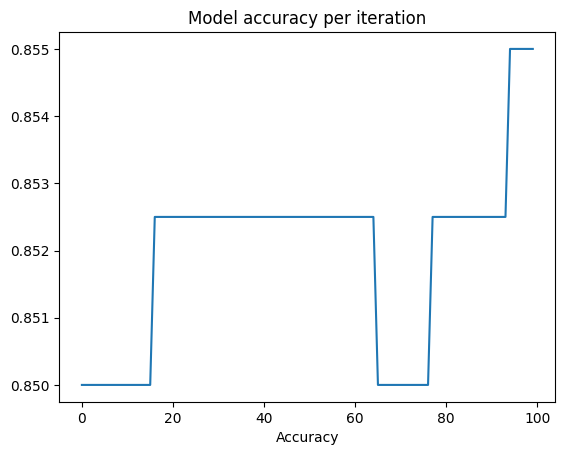

In [ ]:
plt.plot(logistic_acc)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.xlabel("Accuracy");

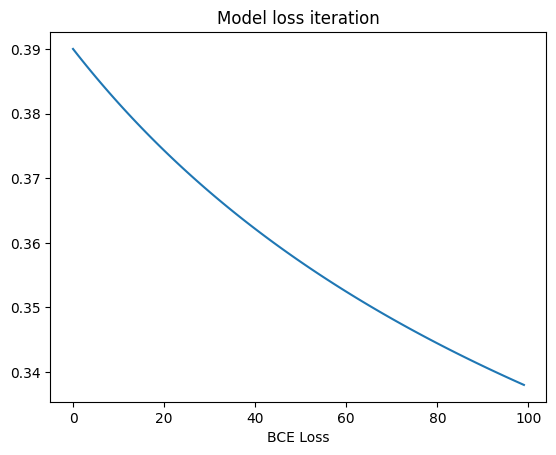

In [ ]:
plt.plot(logistic_loss_log)
plt.title("Model loss iteration")
plt.xlabel("Epoch")
plt.xlabel("BCE Loss");

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
credit_data = pd.read_csv("https://raw.githubusercontent.com/k8xu/credit-risk-classification/refs/heads/master/credit_data.csv")
credit_data = credit_data.drop(['Unnamed: 0'], axis=1)
credit_data.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [ ]:
credit_data = pd.read_csv("Credit_Data.csv")
credit_data.head()

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex  ... present_res_since  \
0                        male : single  ...                 4   
1  female : divorced/separated/married  ...                 2   
2                        male : single  ...                 3   
3                        male : single  ...                 4   
4                        male : single  ...                 4   

                                            property age  \
0                                        real estate  67   
1                                        real estate  22   
2                                        real estate  49   
3  if not A121 : building society savings agreeme...  45   
4                              unknown / no property  53   

   other_installment_plans   housing credits_this_bank  \
0                     none       own                 2   
1                     none       own                 1   
2                     none       own                 1   
3                     none  for free                 1   
4                     none  for free                 2   

                           job people_under_maintenance  \
0  skilled employee / official                        1   
1  skilled employee / official                        1   
2         unskilled - resident                        2   
3  skilled employee / official                        2   
4  skilled employee / official                        2   

                                   telephone foreign_worker  
0  yes, registered under the customers name             yes  
1                                       none            yes  
2                                       none            yes  
3                                       none            yes  
4                                       none            yes  

[5 rows x 21 columns]

In [ ]:
credit_data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
# Rename the default column to class
credit_data.rename(columns={'default': 'class'}, inplace=True)

In [ ]:
credit_data['class'].value_counts()

class
0    700
1    300
Name: count, dtype: int64

In [ ]:
# Find all columns of object types
obj_cols = credit_data.select_dtypes(include=['object']).columns.tolist()
obj_cols

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [ ]:
dataf = credit_data.groupby(['class'])['class'].agg(['count', 'sum'])
dataf

count  sum
class            
0        700    0
1        300  300

In [ ]:
credit_data['class'].value_counts()

class
0    700
1    300
Name: count, dtype: int64

In [ ]:
dataf

count  sum
class            
0        700    0
1        300  300

In [ ]:
dataf.columns = ["Total", "Bad"]
dataf

Total  Bad
class            
0        700    0
1        300  300

In [ ]:
dataf['good'] = dataf['Total'] - dataf['Bad']
dataf

Total  Bad  good
class                  
0        700    0   700
1        300  300     0

In [ ]:
dataf['bad_per'] = dataf['Bad'] / dataf['Bad'].sum()
dataf['good_per'] = dataf['good'] / dataf['good'].sum()

In [ ]:
dataf

Total  Bad  good  bad_per  good_per
class                                     
0        700    0   700      0.0       1.0
1        300  300     0      1.0       0.0

In [ ]:
dataf['I_V'] = (dataf['good_per'] - dataf['bad_per']) * np.log(dataf['good_per'] / dataf['bad_per'])
dataf

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Total  Bad  good  bad_per  good_per  I_V
class                                          
0        700    0   700      0.0       1.0  inf
1        300  300     0      1.0       0.0  inf

In [ ]:
dataf['good_per'] - dataf['bad_per']

class
0    1.0
1   -1.0
dtype: float64

In [ ]:
dataf.good_per / dataf.bad_per

class
0    inf
1    0.0
dtype: float64

In [ ]:
# Reading Dataset from  http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)

headers=["Status_of_existing_checking_account","Duration_in_month","Credit_history",\
         "Purpose","Credit_amount","Savings_account/bonds","Present_employment_since",\
         "Installment_rate_in_percentage_of_disposable_income","Personal_status_and_sex",\
         "Other_debtors","Present_residence since","Property","Age_in_years",\
        "Other_installment_plans","Housing","Number_of_existing_credits_at_this_bank",\
        "Job","Number_of_people_being_liable_to_provide_maintenance_for","Telephone","foreign_worker","Cost_Matrix"]

df.columns=headers

In [ ]:
df.head()

Status_of_existing_checking_account  Duration_in_month Credit_history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit_amount Savings_account/bonds Present_employment_since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment_rate_in_percentage_of_disposable_income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

  Personal_status_and_sex Other_debtors  ...  Property Age_in_years  \
0                     A93          A101  ...      A121           67   
1                     A92          A101  ...      A121           22   
2                     A93          A101  ...      A121           49   
3                     A93          A103  ...      A122           45   
4                     A93          A101  ...      A124           53   

   Other_installment_plans Housing Number_of_existing_credits_at_this_bank  \
0                     A143    A152                                       2   
1                     A143    A152                                       1   
2                     A143    A152                                       1   
3                     A143    A153                                       1   
4                     A143    A153                                       2   

    Job Number_of_people_being_liable_to_provide_maintenance_for  Telephone  \
0  A173                                                  1             A192   
1  A173                                                  1             A191   
2  A172                                                  2             A191   
3  A173                                                  2             A191   
4  A173                                                  2             A191   

  foreign_worker Cost_Matrix  
0           A201           1  
1           A201           2  
2           A201           1  
3           A201           1  
4           A201           2  

[5 rows x 21 columns]

In [ ]:
df.Status_of_existing_checking_account.value_counts()

Status_of_existing_checking_account
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

In [ ]:
#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",
                                     'A11':"<0 DM",
                                     'A12': "0 <= <200 DM",
                                     'A13':">= 200 DM "}
df.Status_of_existing_checking_account=df.Status_of_existing_checking_account.map(Status_of_existing_checking_account)

In [ ]:
df.Status_of_existing_checking_account.value_counts()

Status_of_existing_checking_account
no checking account    394
<0 DM                  274
0 <= <200 DM           269
>= 200 DM               63
Name: count, dtype: int64

In [ ]:
df.Credit_history.value_counts()

Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

In [ ]:
Credit_history={"A34":"critical account",
                "A33":"delay in paying off",
                "A32":"existing credits paid back duly till now",
                "A31":"all credits at this bank paid back duly",
                "A30":"no credits taken"}

df["Credit_history"]=df["Credit_history"].map(Credit_history)

df["Credit_history"].value_counts()

Credit_history
existing credits paid back duly till now    530
critical account                            293
delay in paying off                          88
all credits at this bank paid back duly      49
no credits taken                             40
Name: count, dtype: int64

In [ ]:
df.Purpose.value_counts()

Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

In [ ]:
Purpose={"A40" : "car (new)",
         "A41" : "car (used)",
         "A42" : "furniture/equipment",
         "A43" :"radio/television" ,
         "A44" : "domestic appliances",
         "A45" : "repairs",
         "A46" : "education",
         'A47' : 'vacation',
         'A48' : 'retraining',
         'A49' : 'business',
         'A410' : 'others'}

df["Purpose"]=df["Purpose"].map(Purpose)
df.Purpose.value_counts()

Purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

In [ ]:
df['Savings_account/bonds'].value_counts()

Savings_account/bonds
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

In [ ]:
Saving_account={"A65" : "no savings account",
                "A61" :"<100 DM",
                "A62" : "100 <= <500 DM",
                "A63" :"500 <= < 1000 DM",
                "A64" :">= 1000 DM"}

df["Savings_account/bonds"]=df["Savings_account/bonds"].map(Saving_account)
df['Savings_account/bonds'].value_counts()

Savings_account/bonds
<100 DM               603
no savings account    183
100 <= <500 DM        103
500 <= < 1000 DM       63
>= 1000 DM             48
Name: count, dtype: int64

In [ ]:
Present_employment={'A75':">=7 years",
                    'A74':"4<= <7 years",
                    'A73':"1<= < 4 years",
                    'A72':"<1 years",
                    'A71':"unemployed"}

df["Present_employment_since"]=df["Present_employment_since"].map(Present_employment)
df['Present_employment_since'].value_counts()

Present_employment_since
1<= < 4 years    339
>=7 years        253
4<= <7 years     174
<1 years         172
unemployed        62
Name: count, dtype: int64

In [ ]:
df.Property.value_counts()

Property
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64

In [ ]:
Property={'A121':"real estate",
          'A122':"savings agreement/life insurance",
          'A123':"car or other",
          'A124':"unknown / no property"}

df["Property"]=df["Property"].map(Property)
df.Property.value_counts()

Property
car or other                        332
real estate                         282
savings agreement/life insurance    232
unknown / no property               154
Name: count, dtype: int64

In [ ]:
df.Other_installment_plans.value_counts()

Other_installment_plans
A143    814
A141    139
A142     47
Name: count, dtype: int64

In [ ]:
Other_installment_plans={'A143':"none",
                         'A142':"store",
                         'A141':"bank"}

df["Other_installment_plans"]=df["Other_installment_plans"].map(Other_installment_plans)

In [ ]:
df.Other_installment_plans.value_counts()

Other_installment_plans
none     814
bank     139
store     47
Name: count, dtype: int64

In [ ]:
Housing={'A153':"for free",
         'A152':"own",
         'A151':"rent"}


df["Housing"]=df["Housing"].map(Housing)

df.Housing.value_counts()

Housing
own         713
rent        179
for free    108
Name: count, dtype: int64

In [ ]:
df.Job.value_counts()

Job
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64

In [ ]:
Job={'A174':"management/ highly qualified employee",
     'A173':"skilled employee / official",
     'A172':"unskilled - resident",
     'A171':"unemployed/ unskilled  - non-resident"}

df["Job"]=df["Job"].map(Job)
df.Job.value_counts()

Job
skilled employee / official              630
unskilled - resident                     200
management/ highly qualified employee    148
unemployed/ unskilled  - non-resident     22
Name: count, dtype: int64

In [ ]:
df.Telephone.value_counts()

Telephone
A191    596
A192    404
Name: count, dtype: int64

In [ ]:
Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)

In [ ]:
df.foreign_worker.value_counts()

foreign_worker
A201    963
A202     37
Name: count, dtype: int64

In [ ]:
foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign_worker"]=df["foreign_worker"].map(foreign_worker)
df.foreign_worker.value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

In [ ]:
risk = {1: "Good Risk",
        2: "Bad Risk"}

df["Cost_Matrix"] = df.Cost_Matrix.map(risk)

df.Cost_Matrix.value_counts()

Cost_Matrix
Good Risk    700
Bad Risk     300
Name: count, dtype: int64

In [ ]:
df.head()

Status_of_existing_checking_account  Duration_in_month  \
0                               <0 DM                  6   
1                        0 <= <200 DM                 48   
2                 no checking account                 12   
3                               <0 DM                 42   
4                               <0 DM                 24   

                             Credit_history              Purpose  \
0                          critical account     radio/television   
1  existing credits paid back duly till now     radio/television   
2                          critical account            education   
3  existing credits paid back duly till now  furniture/equipment   
4                       delay in paying off            car (new)   

   Credit_amount Savings_account/bonds Present_employment_since  \
0           1169    no savings account                >=7 years   
1           5951               <100 DM            1<= < 4 years   
2           2096               <100 DM             4<= <7 years   
3           7882               <100 DM             4<= <7 years   
4           4870               <100 DM            1<= < 4 years   

   Installment_rate_in_percentage_of_disposable_income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

  Personal_status_and_sex Other_debtors  ...  \
0                     A93          A101  ...   
1                     A92          A101  ...   
2                     A93          A101  ...   
3                     A93          A103  ...   
4                     A93          A101  ...   

                           Property Age_in_years  Other_installment_plans  \
0                       real estate           67                     none   
1                       real estate           22                     none   
2                       real estate           49                     none   
3  savings agreement/life insurance           45                     none   
4             unknown / no property           53                     none   

    Housing Number_of_existing_credits_at_this_bank  \
0       own                                       2   
1       own                                       1   
2       own                                       1   
3  for free                                       1   
4  for free                                       2   

                           Job  \
0  skilled employee / official   
1  skilled employee / official   
2         unskilled - resident   
3  skilled employee / official   
4  skilled employee / official   

  Number_of_people_being_liable_to_provide_maintenance_for  Telephone  \
0                                                  1              yes   
1                                                  1             none   
2                                                  2             none   
3                                                  2             none   
4                                                  2             none   

  foreign_worker Cost_Matrix  
0            yes   Good Risk  
1            yes    Bad Risk  
2            yes   Good Risk  
3            yes   Good Risk  
4            yes    Bad Risk  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account/bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

## Categorical Variable

### Levels and Propositions

In [ ]:
column_names = df.columns.tolist()
column_names

['Status_of_existing_checking_account',
 'Duration_in_month',
 'Credit_history',
 'Purpose',
 'Credit_amount',
 'Savings_account/bonds',
 'Present_employment_since',
 'Installment_rate_in_percentage_of_disposable_income',
 'Personal_status_and_sex',
 'Other_debtors',
 'Present_residence since',
 'Property',
 'Age_in_years',
 'Other_installment_plans',
 'Housing',
 'Number_of_existing_credits_at_this_bank',
 'Job',
 'Number_of_people_being_liable_to_provide_maintenance_for',
 'Telephone',
 'foreign_worker',
 'Cost_Matrix']

In [ ]:
df['Credit_amount'].value_counts()

Credit_amount
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: count, Length: 921, dtype: int64

In [ ]:
df.Age_in_years.value_counts()

Age_in_years
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: count, dtype: int64

In [ ]:
df.Duration_in_month.value_counts()

Duration_in_month
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [ ]:
# numerical variable
column_names.remove('Credit_amount')
column_names.remove('Age_in_years')
column_names.remove('Duration_in_month')
column_names

['Status_of_existing_checking_account',
 'Credit_history',
 'Purpose',
 'Savings_account/bonds',
 'Present_employment_since',
 'Installment_rate_in_percentage_of_disposable_income',
 'Personal_status_and_sex',
 'Other_debtors',
 'Present_residence since',
 'Property',
 'Other_installment_plans',
 'Housing',
 'Number_of_existing_credits_at_this_bank',
 'Job',
 'Number_of_people_being_liable_to_provide_maintenance_for',
 'Telephone',
 'foreign_worker',
 'Cost_Matrix']

In [ ]:
df['Cost_Matrix'].unique().tolist()

['Good Risk', 'Bad Risk']

In [ ]:
column_names_cat2 = {}

for name in column_names:
  column_names_cat2[name] = df[name].unique().tolist()

column_names_cat2

{'Status_of_existing_checking_account': ['<0 DM',
  '0 <= <200 DM',
  'no checking account',
  '>= 200 DM '],
 'Credit_history': ['critical account',
  'existing credits paid back duly till now',
  'delay in paying off',
  'no credits taken',
  'all credits at this bank paid back duly'],
 'Purpose': ['radio/television',
  'education',
  'furniture/equipment',
  'car (new)',
  'car (used)',
  'business',
  'domestic appliances',
  'repairs',
  'others',
  'retraining'],
 'Savings_account/bonds': ['no savings account',
  '<100 DM',
  '500 <= < 1000 DM',
  '>= 1000 DM',
  '100 <= <500 DM'],
 'Present_employment_since': ['>=7 years',
  '1<= < 4 years',
  '4<= <7 years',
  'unemployed',
  '<1 years'],
 'Installment_rate_in_percentage_of_disposable_income': [4, 2, 3, 1],
 'Personal_status_and_sex': ['A93', 'A92', 'A91', 'A94'],
 'Other_debtors': ['A101', 'A103', 'A102'],
 'Present_residence since': [4, 2, 3, 1],
 'Property': ['real estate',
  'savings agreement/life insurance',
  'unknown / 

In [ ]:
marginal_report_cluster = {}


In [ ]:
column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

    marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

In [ ]:
np.asarray(list(column_names_cat.values()))

array([ 4,  5, 10,  5,  5,  4,  4,  3,  4,  4,  3,  3,  4,  4,  2,  2,  2,
        2])

In [ ]:
column_names_cat.values()

dict_values([4, 5, 10, 5, 5, 4, 4, 3, 4, 4, 3, 3, 4, 4, 2, 2, 2, 2])

In [ ]:
column_names_cat

{'Status_of_existing_checking_account': 4,
 'Credit_history': 5,
 'Purpose': 10,
 'Savings_account/bonds': 5,
 'Present_employment_since': 5,
 'Installment_rate_in_percentage_of_disposable_income': 4,
 'Personal_status_and_sex': 4,
 'Other_debtors': 3,
 'Present_residence since': 4,
 'Property': 4,
 'Other_installment_plans': 3,
 'Housing': 3,
 'Number_of_existing_credits_at_this_bank': 4,
 'Job': 4,
 'Number_of_people_being_liable_to_provide_maintenance_for': 2,
 'Telephone': 2,
 'foreign_worker': 2,
 'Cost_Matrix': 2}

In [ ]:
np.asarray(column_names_cat.values())

array(dict_values([4, 5, 10, 5, 5, 4, 4, 3, 4, 4, 3, 3, 4, 4, 2, 2, 2, 2]),
      dtype=object)

In [ ]:
np.asarray(list(column_names_cat.values()))

array([ 4,  5, 10,  5,  5,  4,  4,  3,  4,  4,  3,  3,  4,  4,  2,  2,  2,
        2])

In [ ]:
np.asarray(list(column_names_cat.values())).max()

10

In [ ]:
marginal_report_cluster

{2: ['Number_of_people_being_liable_to_provide_maintenance_for',
  'Telephone',
  'foreign_worker',
  'Cost_Matrix'],
 3: ['Other_debtors', 'Other_installment_plans', 'Housing'],
 4: ['Status_of_existing_checking_account',
  'Installment_rate_in_percentage_of_disposable_income',
  'Personal_status_and_sex',
  'Present_residence since',
  'Property',
  'Number_of_existing_credits_at_this_bank',
  'Job'],
 5: ['Credit_history', 'Savings_account/bonds', 'Present_employment_since'],
 10: ['Purpose']}

In [ ]:
column_names_cat2

{'Status_of_existing_checking_account': ['<0 DM',
  '0 <= <200 DM',
  'no checking account',
  '>= 200 DM '],
 'Credit_history': ['critical account',
  'existing credits paid back duly till now',
  'delay in paying off',
  'no credits taken',
  'all credits at this bank paid back duly'],
 'Purpose': ['radio/television',
  'education',
  'furniture/equipment',
  'car (new)',
  'car (used)',
  'business',
  'domestic appliances',
  'repairs',
  'others',
  'retraining'],
 'Savings_account/bonds': ['no savings account',
  '<100 DM',
  '500 <= < 1000 DM',
  '>= 1000 DM',
  '100 <= <500 DM'],
 'Present_employment_since': ['>=7 years',
  '1<= < 4 years',
  '4<= <7 years',
  'unemployed',
  '<1 years'],
 'Installment_rate_in_percentage_of_disposable_income': [4, 2, 3, 1],
 'Personal_status_and_sex': ['A93', 'A92', 'A91', 'A94'],
 'Other_debtors': ['A101', 'A103', 'A102'],
 'Present_residence since': [4, 2, 3, 1],
 'Property': ['real estate',
  'savings agreement/life insurance',
  'unknown / 

In [ ]:
d = {k: len(v) for k, v in column_names_cat2.items()}
d

{'Status_of_existing_checking_account': 4,
 'Credit_history': 5,
 'Purpose': 10,
 'Savings_account/bonds': 5,
 'Present_employment_since': 5,
 'Installment_rate_in_percentage_of_disposable_income': 4,
 'Personal_status_and_sex': 4,
 'Other_debtors': 3,
 'Present_residence since': 4,
 'Property': 4,
 'Other_installment_plans': 3,
 'Housing': 3,
 'Number_of_existing_credits_at_this_bank': 4,
 'Job': 4,
 'Number_of_people_being_liable_to_provide_maintenance_for': 2,
 'Telephone': 2,
 'foreign_worker': 2,
 'Cost_Matrix': 2}

In [ ]:
marginal_report_cluster

{2: ['Number_of_people_being_liable_to_provide_maintenance_for',
  'Telephone',
  'foreign_worker',
  'Cost_Matrix'],
 3: ['Other_debtors', 'Other_installment_plans', 'Housing'],
 4: ['Status_of_existing_checking_account',
  'Installment_rate_in_percentage_of_disposable_income',
  'Personal_status_and_sex',
  'Present_residence since',
  'Property',
  'Number_of_existing_credits_at_this_bank',
  'Job'],
 5: ['Credit_history', 'Savings_account/bonds', 'Present_employment_since'],
 10: ['Purpose']}

In [ ]:
marginal_report_cluster.keys()

dict_keys([2, 3, 4, 5, 10])

In [ ]:
marginal_report_cluster[2]

['Number_of_people_being_liable_to_provide_maintenance_for',
 'Telephone',
 'foreign_worker',
 'Cost_Matrix']

In [ ]:
sorted(marginal_report_cluster[2])

['Cost_Matrix',
 'Number_of_people_being_liable_to_provide_maintenance_for',
 'Telephone',
 'foreign_worker']

In [ ]:
!pip install scikit-plot

In [ ]:
#!pip install --upgrade scikit-learn scipy scikit-plot
import numpy as np
import pandas as pd
import seaborn as sns
#from scipy.interpolate import interp # Changed import to reflect updated location of interp object
#import scikitplot as skplt
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
#from sklearn.decomposition import PCA
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [ ]:
def style_specific_cell(x):

    color_thresh = 'background-color: lightpink'

    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number):
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="Percentage":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass

    return df_color

def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'

    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

In [ ]:
for key in marginal_report_cluster.keys():
    marginal_percentage_report=[]
    for name in sorted(marginal_report_cluster[key]):
        data=pd.crosstab(df[name],columns=["Percentage"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"Percentage"]
        data=data.transpose().reset_index()
        [marginal_percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    marginal_percentage_report=pd.DataFrame(marginal_percentage_report)
    [options.append("Category Option "+str(itr)) for itr in range(1,len(marginal_percentage_report.columns))]
    marginal_percentage_report.columns=["Attribute"]+options
    display(marginal_percentage_report.style.apply(style_specific_cell, axis=None))


In [ ]:
df[['Credit_amount', 'Age_in_years', 'Duration_in_month']].describe()

In [ ]:
def visualize_distribution(attr):
  good_risk_df = df[df['Cost_Matrix'] == 'Good Risk']
  bad_risk_df = df[df['Cost_Matrix'] == 'Bad Risk']
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  attr_good_risk_df = good_risk_df[[attr, 'Cost_Matrix']].groupby(attr).count()
  attr_bad_risk_df = bad_risk_df[[attr, 'Cost_Matrix']].groupby(attr).count()
  ax[0].barh(attr_good_risk_df['Cost_Matrix'].index.tolist(),
             attr_good_risk_df['Cost_Matrix'].values.tolist(), align='center', color='#5975A4')
  ax[1].barh(attr_bad_risk_df['Cost_Matrix'].index.tolist(),
             attr_bad_risk_df['Cost_Matrix'].values.tolist(), align='center', color='#B55D60')
  ax[0].set_title('Good Risk')
  ax[1].set_title('Bad Risk')
  ax[0].invert_xaxis()
  ax[1].yaxis.tick_right()

  num_para_change = ['Present_residence_since',
                     'Number_of_existing_credits_at_this_bank',
                     'Installement_rate_in_percentage_of_disposable_income',
                     'Number_of_people_being_liable_to_provide_maintenance_for']
  if attr in num_para_change:
    for i, v in enumerate(attr_good_risk_df['Cost_Matrix'].tolist()):
      ax[0].text(v+15, i+1, str(v), color='black')
    for i, v in enumerate(attr_bad_risk_df['Cost_Matrix'].tolist()):
      ax[1].text(v+2, i+1, str(v), color='black')
  else:
    for i, v in enumerate(attr_good_risk_df['Cost_Matrix'].tolist()):
      ax[0].text(v+25, i + .05, str(v), color='black')
    for i, v in enumerate(attr_bad_risk_df['Cost_Matrix'].tolist()):
      ax[1].text(v+1, i + .05, str(v), color='black')

  plt.suptitle(attr)
  plt.tight_layout()
  plt.show()

In [ ]:
visualize_distribution("Status_of_existing_checking_account")

In [ ]:
visualize_distribution("Credit_history")

In [ ]:
visualize_distribution('Purpose')

In [ ]:
visualize_distribution('Savings_account/bonds')

In [ ]:
visualize_distribution('Present_employment_since')

In [ ]:
visualize_distribution('Installment_rate_in_percentage_of_disposable_income')

In [ ]:
visualize_distribution('Personal_status_and_sex')

In [ ]:
visualize_distribution('Other_debtors')

In [ ]:
visualize_distribution('Property')

In [ ]:
visualize_distribution('Other_installment_plans')

In [ ]:
visualize_distribution('Housing')

In [ ]:
visualize_distribution('Number_of_existing_credits_at_this_bank')

In [ ]:
visualize_distribution("Number_of_people_being_liable_to_provide_maintenance_for")

In [ ]:
visualize_distribution("foreign_worker")

In [ ]:
df['Duration_in_year'] = df['Duration_in_month'].apply(lambda x: (floor(x/12)))
visualize_distribution('Duration_in_year')

In [ ]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df['Age_Category'] = pd.cut(df['Age_in_years'], age_interval, labels=age_category)
visualize_distribution('Age_Category')

In [ ]:
sns.set()
f, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df['Credit_amount'],
            x=df['Cost_Matrix'],
            orient='v',
            ax=axes[0],
            palette=['#5975A4', '#B55D60'],
            legend=False,
            hue=df['Cost_Matrix'])

axes[0].set_xlabel('Cost Matrix')
axes[0].set_ylabel('Credit Amount')

sns.boxplot(y=df['Duration_in_month'],
            x=df['Cost_Matrix'],
            orient='v',
            ax=axes[1],
            palette=['#5975A4', '#B55D60'],
            hue=df['Cost_Matrix'])

axes[1].set_xlabel('Cost Matrix')
axes[1].set_ylabel('Duration in month')


sns.boxplot(y=df["Age_in_years"],
            x=df["Cost_Matrix"],
            orient='v' ,
            ax=axes[2],
            palette=["#5975A4","#B55D60"],
            hue=df['Cost_Matrix']) #box plot

axes[2].set_xlabel('Cost Matrix')
axes[2].set_ylabel('Age in years');

In [ ]:
import plotly.express as px

# Create your first figure with plotly!
fig = px.line(x=[1, 2, 3, 4, 5],
              y=[1, 2, 3, 4, 5],
              title="Hello Plotly!")

# Show the plot. This will open a new window in your browser
fig.show()

In [ ]:
!pip install dash

In [ ]:
import dash

dash.__version__

In [ ]:
# Import the Express module from Plotly as px
import plotly.express as px

# Create your first figure with Plotly!
fig = px.line(x=[1, 2, 3, 4, 5],
              y=[4, 1, 3, 2, 5],
              title='Hello Plotly!')

# Show the figure
fig.show()

In [ ]:
import dash
from dash import dcc, html

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div(
    dcc.Graph(
        id='example-graph',
        figure=px.line(
            x=[1, 2, 3, 4, 5],
            y=[4, 1, 3, 2, 5],
            title='Hello Dash!'
        )
    )
)

if __name__ == '__main__':
  app.run() # Inline
  #app.run_server(jupyter_mode='external') # Open in a new window
  #app.run(jupyter_mode='tab')
  #app.run(jupyter_mode='jupyterlab') # Open in a new tab of Jupyter Lab. Only works in Jupyter Lab.

In [ ]:
# Create a Figure using Plotly Express and check its type
fig = px.line(x=[0, 1, 2, 3, 4],
              y=[0, 1, 4, 9, 16],
              markers=True,
              title="Hello Plotly Express!")

type(fig)

In [ ]:
fig.show()

In [ ]:
dir(fig)

In [ ]:
fig.data

In [ ]:
fig.layout

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
type(fig)

In [ ]:
fig.show()

In [ ]:
fig.data

In [ ]:
fig.layout

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        y=[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
    )
)

fig.update_layout(
    title="Hello Plotly Go",
    xaxis_title='x',
    yaxis_title='y'
)

fig.show()

In [ ]:
fig.data

In [ ]:
fig.layout

Layout({
    'template': '...',
    'title': {'text': 'Hello Plotly Go'},
    'xaxis': {'title': {'text': 'x'}},
    'yaxis': {'title': {'text': 'y'}}
})

## Using Dictionaries to make Figures

In [ ]:
# import the module Plotly IO as pio
import plotly.io as pio

# Create a dictionary to specify both the data and the layout of your figure
fig = dict({
    "data": [{"type": "scatter",
              "x": [1, 2, 3, 4, 5, 6, 7],
              "y": [1, 4, 9, 16, 25, 36, 49],
              "marker": {'symbol': 'circle',
                         'size': 10,
                        'color': 'red'}
              }],
    "layout": {"title": {"text": "A Figure Specified By a Python Dictionary"}}
})

# Display your figure
pio.show(fig)

In [ ]:
import numpy as np

x = np.linspace(-10, 10, 300)
y = np.sin(x)

fig = dict({
    "data": [{
        "type": "scatter",
        "x": x,
        "y": y,
        "marker": {'symbol': 'circle'},
        'line_color': 'red'
    }],
    "layout": {"title": {"text": "A More Interesting Figure Specified By a Python Dictionary"}}
})

# Display your figure
pio.show(fig)

In [ ]:
# Create a dictionary to specify both the data and the layout of your figure.
fig = dict({
    "data": [{
        "type": "bar",
        "x": [1, 2, 3],
        "y": [10, 30, 15]}],
    "layout": {"title": {"text": "A Bar Chart Specified By a Python Dictionary"}}
})

# Display your figure
pio.show(fig)

In [ ]:
!pip install -U kaleido

## Saving Plotly Figures

### Getting ready

In [ ]:
import numpy as np
import plotly
import plotly.express as px

x = np.linspace(-10, 10, 300)
y = np.sin(x)

fig = px.line(x=x, y=y)
fig.show()

In [ ]:
plotly.offline.plot(fig, filename='line_plot.html')

'line_plot.html'

In [ ]:
!pip show kaleido

Name: kaleido
Version: 0.2.1
Summary: Static image export for web-based visualization libraries with zero dependencies
Home-page: UNKNOWN
Author: Jon Mease
Author-email: jon@plotly.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
from importlib.metadata import version
version('kaleido')

'0.2.1'

In [ ]:
!pip install -U plotly kaleido
import plotly.io as pio # import plotly

import numpy as np
import plotly

import plotly.express as px

x = np.linspace(-10, 10, 300)
y = np.sin(x)

fig = px.line(x=x, y=y)
fig.show()


fig.write_image('line_plot.png') # export the figure as a png image
fig.write_image('line_plot.webp') # export the figure as a webp image
fig.write_image('line_plot.pdf') # export the figure as a pdf image

In [ ]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=3875a0e4df004f3479b3a2d0a9174655fc230977227fb2f11bc7f77eb82960a1
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("Aggregations").getOrCreate()


In [ ]:
df = spark.createDataFrame(
    [(1, 'north', 100, 'walmart'),
     (2, 'south', 300, 'apple'),
     (3, 'west', 200, 'google'),
     (1, 'east', 200, 'google'),
     (2, 'north', 100, 'walmart'),
     (3, 'west', 300, 'apple'),
     (1, 'north', 200, 'walmart'),
     (2, 'east', 500, 'google'),
     (4, 'west', 400, 'apple')],
    ["emp_id", "region", "sales", "customer"]
)

In [ ]:
df

DataFrame[emp_id: bigint, region: string, sales: bigint, customer: string]

In [ ]:
df.show()

+------+------+-----+--------+
|emp_id|region|sales|customer|
+------+------+-----+--------+
|     1| north|  100| walmart|
|     2| south|  300|   apple|
|     3|  west|  200|  google|
|     1|  east|  200|  google|
|     2| north|  100| walmart|
|     3|  west|  300|   apple|
|     1| north|  200| walmart|
|     2|  east|  500|  google|
|     4|  west|  400|   apple|
+------+------+-----+--------+



In [ ]:
df.agg({"sales": "sum"})

DataFrame[sum(sales): bigint]

In [ ]:
df.agg({"sales": "sum"}).show()

+----------+
|sum(sales)|
+----------+
|      2300|
+----------+



In [ ]:
df.agg({'sales': 'max'}).show()

+----------+
|max(sales)|
+----------+
|       500|
+----------+



In [ ]:
df.agg({'sales': 'count'}).show()

+------------+
|count(sales)|
+------------+
|           9|
+------------+



In [ ]:
df.agg({'sales': 'mean'}).show()

+------------------+
|        avg(sales)|
+------------------+
|255.55555555555554|
+------------------+



In [ ]:
df.agg({
    'sales': 'mean',
    'customer': 'count'
}).show()

+------------------+---------------+
|        avg(sales)|count(customer)|
+------------------+---------------+
|255.55555555555554|              9|
+------------------+---------------+



## AAAMLP - Evaluation Metrics

If we talk about classification problems, the most common metrics used are:
* Accuracy
* Precision (P)
* Recall (R)
& F1 score (F1)
* Area under the ROC (Receiver Operating Characteristic ) curve or simply AUC (AUC)
* Log losss
* Precision at k (P@k)
* Average precision at k (AP@k)
* Mean average precision at k (MAP@k)

When it comes to regression, the most commonly used evaluation metrics are:
* Mean absolute error (MAE)
* Mean squared error (MSE)
* Root mean squared error (RMSE)
* Root mean squared logarithmic error (RMSLE)
* Mean percentage error (MPE)
* Mean absolute percentage error (MAPE)
* R$^2$

_When we have an equal number of positive and negative samples in a binary classification metric, we generally use ***accuracy***, ***precision***, ***recall*** and ***f1***_

In [ ]:
def accuracy(y_true, y_pred):
  """
  Function to calculate accuracy
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  # Initialise a simple counter for correct predictions
  correct_counter = 0
  # loop over all elements of y_true
  # and y_pred "together"
  for yt, yp, in zip(y_true, y_pred):
    if yt == yp:
      # if prediction is equal to truth, increase the counter
      correct_counter += 1

  # return accuracy
  # which is correct predictions over the number of samples
  return correct_counter / len(y_true)

In [ ]:
from sklearn import metrics

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

metrics.accuracy_score(l1, l2)

0.625

In [ ]:
metrics.accuracy_score(l2, l1)

0.625

In [ ]:
accuracy(l1, l2)

0.625

In [ ]:
accuracy(l2, l1)

0.625

When the data is heavily skewed, it is not advisable to use accuracy as an evaluation metric as it is not representative of the data. __So you might get high accuracy, but your model will probably not perform that well when it comes to real-world samples, and you won't be able to explain to your managers why.__ In these cases, it's better to look at other metrics such as **precision**.

- **True positive**: predicted class is positive and actual class is positive
- **True negative**: predicted class is negative and actual class is negative
- **False positive**: predicted class is positive but actual class is negative
- **False negative**: predicted class is negative but actual class is positive

_In simple words, if your model **incorrectly (or falsely)** predicts positive class, it is a false positive. If your model **incorrectly (or falsely)** predicts negative class, it is a false negative._

In [ ]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true positives
  """
  # Initialise
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

In [ ]:
def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true negatives
  """
  # Initialise
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  return tn

In [ ]:
def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false positives
  """
  # Initialise
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  return fp

In [ ]:
def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false negatives
  """
  # Initialise
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn

In [ ]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

In [ ]:
true_positive(l1, l2)

2

In [ ]:
true_positive(l2, l1)

2

In [ ]:
false_positive(l1, l2)

1

In [ ]:
false_positive(l2, l1)

2

In [ ]:
true_negative(l1, l2)

3

In [ ]:
def accuracy_v2(y_true, y_pred):
  """
  Function to calculate accuracy using tp/tn/fp/fn
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [ ]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

In [ ]:
accuracy(l1, l2)

0.625

In [ ]:
accuracy_v2(l1, l2)

0.625

In [ ]:
metrics.accuracy_score(l1, l2)

0.625

In [ ]:
def precision(y_true, y_pred):
  """
  Function to calculate precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision_score = tp / (tp + fp)
  return precision_score

In [ ]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

In [ ]:
precision(l1, l2)

0.6666666666666666

In [ ]:
precision(l2, l1)

0.5

In [ ]:
def recall(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: recall score
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall_score = tp / (tp + fn)
  return recall_score

In [ ]:
recall(l1, l2)

0.5

In [ ]:
recall(l2, l1)

0.6666666666666666

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [ ]:
len(y_true), len(y_pred)

(20, 20)

In [ ]:
precisions = []
recalls = []
# How we assumed these thresholds is a long story -:)
thresholds = [0.0490937 , 0.05934905, 0.079377,
0.08584789, 0.11114267, 0.11639273,
0.15952202, 0.17554844, 0.18521942,
0.27259048, 0.31620708, 0.33056815,
0.39095342, 0.61977213]

In [ ]:
# For every threshold, calculate predictions in binary
# and append calculated precisions and recalls to their
# respective lists
for threshold in thresholds:
  y_pred_temp = [1 if x >= threshold else 0 for x in y_pred]
  p = precision(y_true, y_pred_temp)
  r = recall(y_true, y_pred_temp)
  precisions.append(p)
  recalls.append(r)

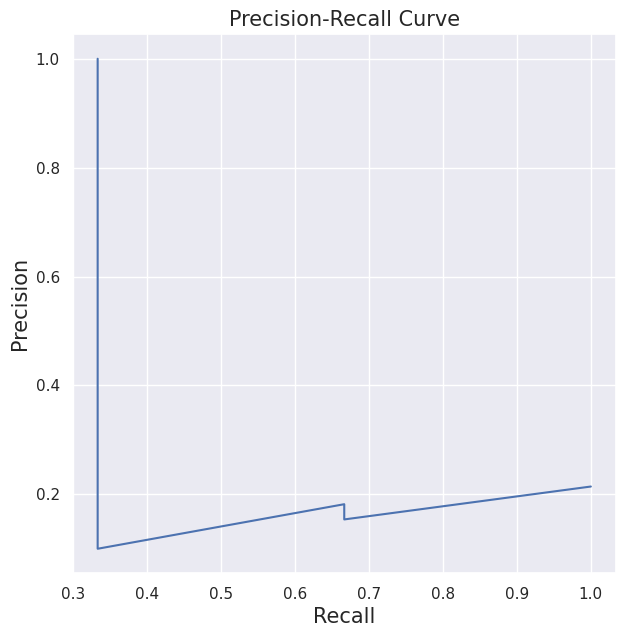

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.title("Precision-Recall Curve", fontsize=15);

In [ ]:
def f1(y_true, y_pred):
  """
  Function to calculate f1 score
  :param y_true: list of true values
  :param y_pred: list of predicted values
  """
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)

  f1_score = 2 * p * r / (p + r)

  return f1_score

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [ ]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

The **TPR or True Positive Rate** is the same thing as **recall** $$TPR = \frac{TP}{TP + FN}$$ **TPR** is also known as **sensitivity**.

In [ ]:
def tpr(y_true, y_pred):
  """
  Function to calculate tpr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: tpr / recall
  """
  return recall(y_true, y_pred)

The **False Positive Rate (FPR)** is defined as $$FPR = \frac{FP}{TN + FP}$$

In [ ]:
def fpr(y_true, y_pred):
  """
  Function to calculate fpr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: fpr
  """
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

The **Specificity or True Negative Rate (TNR)** is then defined as $TNR = 1 - FPR$.

In [ ]:
def tnr(y_true, y_pred):
  """
  Function to calculate tnr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: tnr / specificity
  """
  return 1 - fpr(y_true, y_pred)

In [ ]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
  # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # calculate tpr
  temp_tpr = tpr(y_true, temp_pred)
  # calculate fpr
  temp_fpr = fpr(y_true, temp_pred)
  # append tpr and fpr to lists
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

In [ ]:
results = pd.DataFrame({
    "threshold": thresholds,
    "tpr": tpr_list,
    "fpr": fpr_list
})

In [ ]:
results

threshold  tpr  fpr
0        0.00  1.0  1.0
1        0.10  1.0  0.9
2        0.20  1.0  0.7
3        0.30  0.8  0.6
4        0.40  0.8  0.3
5        0.50  0.8  0.3
6        0.60  0.8  0.2
7        0.70  0.6  0.1
8        0.80  0.6  0.1
9        0.85  0.4  0.1
10       0.90  0.4  0.0
11       0.99  0.2  0.0
12       1.00  0.0  0.0

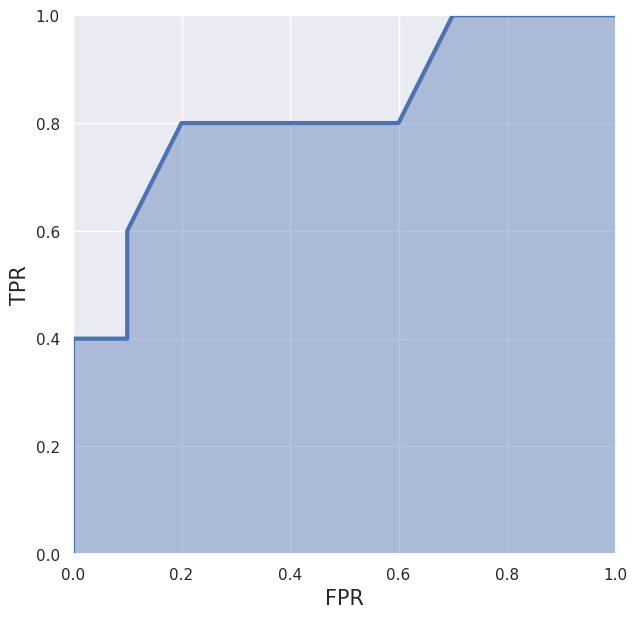

In [ ]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show();

In [ ]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2,0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

## Data Joining

In [ ]:
import pyspark
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("Data Joining").getOrCreate()

In [ ]:
spark

### Inner Join

In [ ]:
df_left = spark.createDataFrame(
    [(1001, 1, 100),
     (1002, 2, 200),
     (1003, 3, 300),
     (1004, 1, 200),
     (1005, 6, 200)],
    ["order_id", "customer_id", "amount"]
)

In [ ]:
df_left

DataFrame[order_id: bigint, customer_id: bigint, amount: bigint]

In [ ]:
df_left.show()

+--------+-----------+------+
|order_id|customer_id|amount|
+--------+-----------+------+
|    1001|          1|   100|
|    1002|          2|   200|
|    1003|          3|   300|
|    1004|          1|   200|
|    1005|          6|   200|
+--------+-----------+------+



In [ ]:
df_right = spark.createDataFrame(
    [(1, "john"),
     (2, "mike"),
     (3, "tony"),
     (4, "kent")],
    ["customer_id", "name"]
)

df_right.show()

+-----------+----+
|customer_id|name|
+-----------+----+
|          1|john|
|          2|mike|
|          3|tony|
|          4|kent|
+-----------+----+



In [ ]:
df_left.join(df_right, on='customer_id', how='inner').show()

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          1|    1004|   200|john|
|          2|    1002|   200|mike|
|          3|    1003|   300|tony|
+-----------+--------+------+----+



In [ ]:
#@title Left Join

df_left.join(df_right, on='customer_id', how='left').show()
df_left.join(df_right, on='customer_id', how='left_outer').show()
df_left.join(df_right, on='customer_id', how='leftouter').show()

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          2|    1002|   200|mike|
|          6|    1005|   200|NULL|
|          1|    1004|   200|john|
|          3|    1003|   300|tony|
+-----------+--------+------+----+

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          2|    1002|   200|mike|
|          6|    1005|   200|NULL|
|          1|    1004|   200|john|
|          3|    1003|   300|tony|
+-----------+--------+------+----+

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          2|    1002|   200|mike|
|          6|    1005|   200|NULL|
|          1|    1004|   200|john|
|          3|    1003|   300|tony|
+-----------+--------+------+----+



In [ ]:
#@title Full Join

df_left.join(df_right, on='customer_id', how='full').show()
df_left.join(df_right, on='customer_id', how='fullouter').show()
df_left.join(df_right, on='customer_id', how='full_outer').show()

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          1|    1004|   200|john|
|          2|    1002|   200|mike|
|          3|    1003|   300|tony|
|          4|    NULL|  NULL|kent|
|          6|    1005|   200|NULL|
+-----------+--------+------+----+

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          1|    1004|   200|john|
|          2|    1002|   200|mike|
|          3|    1003|   300|tony|
|          4|    NULL|  NULL|kent|
|          6|    1005|   200|NULL|
+-----------+--------+------+----+

+-----------+--------+------+----+
|customer_id|order_id|amount|name|
+-----------+--------+------+----+
|          1|    1001|   100|john|
|          1|    1004|   200|john|
|          2|    1002|   200|mike|
|          3|    1003|   300|tony|
|          4|    NULL|  NULL|kent|
|          6|    1

In [ ]:
#@title Cross Join

spark.conf.set("spark.sql.crossJoin.enabled", 'true')
df_left.crossJoin(df_right).show()

+--------+-----------+------+-----------+----+
|order_id|customer_id|amount|customer_id|name|
+--------+-----------+------+-----------+----+
|    1001|          1|   100|          1|john|
|    1001|          1|   100|          2|mike|
|    1002|          2|   200|          1|john|
|    1002|          2|   200|          2|mike|
|    1001|          1|   100|          3|tony|
|    1001|          1|   100|          4|kent|
|    1002|          2|   200|          3|tony|
|    1002|          2|   200|          4|kent|
|    1003|          3|   300|          1|john|
|    1003|          3|   300|          2|mike|
|    1004|          1|   200|          1|john|
|    1004|          1|   200|          2|mike|
|    1005|          6|   200|          1|john|
|    1005|          6|   200|          2|mike|
|    1003|          3|   300|          3|tony|
|    1003|          3|   300|          4|kent|
|    1004|          1|   200|          3|tony|
|    1004|          1|   200|          4|kent|
|    1005|   

In [ ]:
df_left.join(df_right, on='customer_id', how='semi').show()

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          1|    1001|   100|
|          1|    1004|   200|
|          2|    1002|   200|
|          3|    1003|   300|
+-----------+--------+------+



In [ ]:
df_left.join(df_right, on='customer_id', how='leftsemi').show()

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          1|    1001|   100|
|          1|    1004|   200|
|          2|    1002|   200|
|          3|    1003|   300|
+-----------+--------+------+



In [ ]:
df_left.join(df_right,on="customer_id",how="left_semi").show()

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          1|    1001|   100|
|          1|    1004|   200|
|          2|    1002|   200|
|          3|    1003|   300|
+-----------+--------+------+



In [ ]:
df_left.show()

+--------+-----------+------+
|order_id|customer_id|amount|
+--------+-----------+------+
|    1001|          1|   100|
|    1002|          2|   200|
|    1003|          3|   300|
|    1004|          1|   200|
|    1005|          6|   200|
+--------+-----------+------+



In [ ]:
df_right.show()

+-----------+----+
|customer_id|name|
+-----------+----+
|          1|john|
|          2|mike|
|          3|tony|
|          4|kent|
+-----------+----+



In [ ]:
#@title Anti Join

df_left.join(df_right, on='customer_id', how='anti').show()
df_left.join(df_right, on='customer_id', how='leftanti').show()
df_left.join(df_right, on='customer_id', how='left_anti').show()

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          6|    1005|   200|
+-----------+--------+------+

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          6|    1005|   200|
+-----------+--------+------+

+-----------+--------+------+
|customer_id|order_id|amount|
+-----------+--------+------+
|          6|    1005|   200|
+-----------+--------+------+



In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()

df = spark.createDataFrame(
    [(1,"north",100,"walmart"),
     (2,"south",300,"apple"),
     (3,"west",200,"google"),
     (1,"east",200,"google"),
     (2,"north",100,"walmart"),
     (3,"west",300,"apple"),
     (1,"north",200,"walmart"),
     (2,"east",500,"google"),
     (3,"west",400,"apple"),],
      ["emp_id","region","sales","customer"])

df.show()

+------+------+-----+--------+
|emp_id|region|sales|customer|
+------+------+-----+--------+
|     1| north|  100| walmart|
|     2| south|  300|   apple|
|     3|  west|  200|  google|
|     1|  east|  200|  google|
|     2| north|  100| walmart|
|     3|  west|  300|   apple|
|     1| north|  200| walmart|
|     2|  east|  500|  google|
|     3|  west|  400|   apple|
+------+------+-----+--------+



In [ ]:
# Calculates the total sales achieved by every employee.
# 1 - Group the recordsin the column emp_id for each unique value of emp_id
# 2 - For each group, that is, for every employee id, calculates the sum.
# 3 - Output is sorted by employee id.

df.groupby('emp_id').agg({'sales': 'sum'}).show()

+------+----------+
|emp_id|sum(sales)|
+------+----------+
|     1|       500|
|     3|       900|
|     2|       900|
+------+----------+



In [ ]:
df.groupby('emp_id').agg({'sales': 'sum'}).orderBy('emp_id').show()

+------+----------+
|emp_id|sum(sales)|
+------+----------+
|     1|       500|
|     2|       900|
|     3|       900|
+------+----------+



In [ ]:
df.groupby('emp_id').agg({'sales': 'max'}).orderBy('emp_id').show()

+------+----------+
|emp_id|max(sales)|
+------+----------+
|     1|       200|
|     2|       500|
|     3|       400|
+------+----------+



In [ ]:
df.show()

+------+------+-----+--------+
|emp_id|region|sales|customer|
+------+------+-----+--------+
|     1| north|  100| walmart|
|     2| south|  300|   apple|
|     3|  west|  200|  google|
|     1|  east|  200|  google|
|     2| north|  100| walmart|
|     3|  west|  300|   apple|
|     1| north|  200| walmart|
|     2|  east|  500|  google|
|     3|  west|  400|   apple|
+------+------+-----+--------+



In [ ]:
# Sum of sales per region, order by region
df.groupby('region').agg({'sales':'sum'}).orderBy('region').show()

+------+----------+
|region|sum(sales)|
+------+----------+
|  east|       700|
| north|       400|
| south|       300|
|  west|       900|
+------+----------+



In [ ]:
df.groupby('region').agg({'sales':'mean'}).orderBy('region').show()

+------+------------------+
|region|        avg(sales)|
+------+------------------+
|  east|             350.0|
| north|133.33333333333334|
| south|             300.0|
|  west|             300.0|
+------+------------------+



In [ ]:
df.groupby('customer').agg({'sales': 'sum'}).orderBy('customer').show()

+--------+----------+
|customer|sum(sales)|
+--------+----------+
|   apple|      1000|
|  google|       900|
| walmart|       400|
+--------+----------+



In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("GMMClustering").getOrCreate()
df = spark.createDataFrame(
    [("sales",1,7000),
     ("sales",2,6000),
      ("sales",9,5000),
       ("sales",10,6000),
        ("hr",3,2000),
         ("hr",4,6000),
          ("hr",7,3000),
           ("it",5,5000),
            ("it",6,11000),
             ("it",8,19000)],
              ["dept_id","emp_id","salary"])
df.show()

+-------+------+------+
|dept_id|emp_id|salary|
+-------+------+------+
|  sales|     1|  7000|
|  sales|     2|  6000|
|  sales|     9|  5000|
|  sales|    10|  6000|
|     hr|     3|  2000|
|     hr|     4|  6000|
|     hr|     7|  3000|
|     it|     5|  5000|
|     it|     6| 11000|
|     it|     8| 19000|
+-------+------+------+



In [ ]:
from pyspark.sql import functions as func
from pyspark.sql import Window

window = Window.partitionBy('dept_id').orderBy('emp_id').rowsBetween(-2, 0)

window

In [ ]:
df.withColumn('sum', func.sum('salary').over(window)).show()

+-------+------+------+-----+
|dept_id|emp_id|salary|  sum|
+-------+------+------+-----+
|     hr|     3|  2000| 2000|
|     hr|     4|  6000| 8000|
|     hr|     7|  3000|11000|
|     it|     5|  5000| 5000|
|     it|     6| 11000|16000|
|     it|     8| 19000|35000|
|  sales|     1|  7000| 7000|
|  sales|     2|  6000|13000|
|  sales|     9|  5000|18000|
|  sales|    10|  6000|17000|
+-------+------+------+-----+



In [ ]:
window = Window.partitionBy("dept_id").orderBy("emp_id").rowsBetween(0, 2)
df.withColumn("sum",func.sum("salary").over(window)).show()

+-------+------+------+-----+
|dept_id|emp_id|salary|  sum|
+-------+------+------+-----+
|     hr|     3|  2000|11000|
|     hr|     4|  6000| 9000|
|     hr|     7|  3000| 3000|
|     it|     5|  5000|35000|
|     it|     6| 11000|30000|
|     it|     8| 19000|19000|
|  sales|     1|  7000|18000|
|  sales|     2|  6000|17000|
|  sales|     9|  5000|11000|
|  sales|    10|  6000| 6000|
+-------+------+------+-----+



In [ ]:
window = Window.partitionBy('dept_id').orderBy(func.col('salary').desc())
df.withColumn('previous_row_salary', func.lag('salary', 1).over(window)).show()

+-------+------+------+-------------------+
|dept_id|emp_id|salary|previous_row_salary|
+-------+------+------+-------------------+
|     hr|     4|  6000|               NULL|
|     hr|     7|  3000|               6000|
|     hr|     3|  2000|               3000|
|     it|     8| 19000|               NULL|
|     it|     6| 11000|              19000|
|     it|     5|  5000|              11000|
|  sales|     1|  7000|               NULL|
|  sales|     2|  6000|               7000|
|  sales|    10|  6000|               6000|
|  sales|     9|  5000|               6000|
+-------+------+------+-------------------+



In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from pyspark.sql.functions import monotonically_increasing_id
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [ ]:
df1 = spark.createDataFrame(features, ['feature1', 'feature2'])
df1.show(n=5)

+-------------------+-------------------+
|           feature1|           feature2|
+-------------------+-------------------+
|  9.770758741876183| 3.2762102164481477|
| -9.713496659299548| 11.274518015230187|
| -6.913305816480285| -9.347559114861983|
|-10.861859130268911|-10.750634972811474|
|  -8.50038027274785| -4.543703826468128|
+-------------------+-------------------+
only showing top 5 rows



In [ ]:
df1 = df1.withColumn('id1', monotonically_increasing_id())
df1.show(n=5)

+-------------------+-------------------+---+
|           feature1|           feature2|id1|
+-------------------+-------------------+---+
|  9.770758741876183| 3.2762102164481477|  0|
| -9.713496659299548| 11.274518015230187|  1|
| -6.913305816480285| -9.347559114861983|  2|
|-10.861859130268911|-10.750634972811474|  3|
|  -8.50038027274785| -4.543703826468128|  4|
+-------------------+-------------------+---+
only showing top 5 rows



In [ ]:
df2 = spark.createDataFrame(true_labels, ['true_label'])
df2.show(n=5)

+----------+
|true_label|
+----------+
|         1|
|         0|
|         2|
|         2|
|         2|
+----------+
only showing top 5 rows



In [ ]:
df2 = df2.withColumn('id1', monotonically_increasing_id())
df2.show(n=5)

+----------+---+
|true_label|id1|
+----------+---+
|         1|  0|
|         0|  1|
|         2|  2|
|         2|  3|
|         2|  4|
+----------+---+
only showing top 5 rows



In [ ]:
df = df1.join(df2, on='id1')
df.show(n=5)

+---+------------------+-------------------+----------+
|id1|          feature1|           feature2|true_label|
+---+------------------+-------------------+----------+
| 26|-5.674429960964083|  10.04745567864892|         0|
| 29| 1.238264381313376|-1.6580860020410277|         1|
| 65|-6.332213028324228| -8.530706005462632|         2|
| 19|-2.518080946751552|-10.284102215049781|         2|
| 54|-6.575133096563175|  7.034714555112872|         0|
+---+------------------+-------------------+----------+
only showing top 5 rows



In [ ]:
assembler = VectorAssembler(
    inputCols=['feature1', 'feature2'],
    outputCol='features'
)

data_df = assembler.transform(df)

In [ ]:
data_df.show(n=5)

+---+------------------+-------------------+----------+--------------------+
|id1|          feature1|           feature2|true_label|            features|
+---+------------------+-------------------+----------+--------------------+
| 26|-5.674429960964083|  10.04745567864892|         0|[-5.6744299609640...|
| 29| 1.238264381313376|-1.6580860020410277|         1|[1.23826438131337...|
| 65|-6.332213028324228| -8.530706005462632|         2|[-6.3322130283242...|
| 19|-2.518080946751552|-10.284102215049781|         2|[-2.5180809467515...|
| 54|-6.575133096563175|  7.034714555112872|         0|[-6.5751330965631...|
+---+------------------+-------------------+----------+--------------------+
only showing top 5 rows



In [ ]:
# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)
data_df.show(n=5)

+---+------------------+-------------------+----------+--------------------+--------------------+
|id1|          feature1|           feature2|true_label|            features|     scaled_features|
+---+------------------+-------------------+----------+--------------------+--------------------+
| 26|-5.674429960964083|  10.04745567864892|         0|[-5.6744299609640...|[-1.0626021067519...|
| 29| 1.238264381313376|-1.6580860020410277|         1|[1.23826438131337...|[0.23187921066099...|
| 65|-6.332213028324228| -8.530706005462632|         2|[-6.3322130283242...|[-1.1857795321446...|
| 19|-2.518080946751552|-10.284102215049781|         2|[-2.5180809467515...|[-0.4715395444823...|
| 54|-6.575133096563175|  7.034714555112872|         0|[-6.5751330965631...|[-1.2312691016800...|
+---+------------------+-------------------+----------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
kmeans = KMeans(k=3, featuresCol='scaled_features', predictionCol='cluster')
model = kmeans.fit(data_df)

In [ ]:
predictions = model.transform(data_df)
predictions.show(n=5)

+---+------------------+-------------------+----------+--------------------+--------------------+-------+
|id1|          feature1|           feature2|true_label|            features|     scaled_features|cluster|
+---+------------------+-------------------+----------+--------------------+--------------------+-------+
| 26|-5.674429960964083|  10.04745567864892|         0|[-5.6744299609640...|[-1.0626021067519...|      2|
| 29| 1.238264381313376|-1.6580860020410277|         1|[1.23826438131337...|[0.23187921066099...|      0|
| 65|-6.332213028324228| -8.530706005462632|         2|[-6.3322130283242...|[-1.1857795321446...|      1|
| 19|-2.518080946751552|-10.284102215049781|         2|[-2.5180809467515...|[-0.4715395444823...|      1|
| 54|-6.575133096563175|  7.034714555112872|         0|[-6.5751330965631...|[-1.2312691016800...|      2|
+---+------------------+-------------------+----------+--------------------+--------------------+-------+
only showing top 5 rows



In [ ]:
evaluator = ClusteringEvaluator(
    predictionCol='cluster',
    featuresCol='scaled_features',
    metricName='silhouette',
    distanceMeasure='squaredEuclidean'
)

evaluator

ClusteringEvaluator_0755c3e2eb37

In [ ]:
silhouette = evaluator.evaluate(predictions)
silhouette

0.7851032706829325

In [ ]:
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.7851


In [ ]:
# Finding the optimal number of clusters
# Computing WSSSE for K values from 2 to 8
wssse_values = []

evaluator = ClusteringEvaluator(
    predictionCol='cluster',
    featuresCol='scaled_features',
    metricName='silhouette',
    distanceMeasure='squaredEuclidean'
)

for i in range(2, 8):
  KMeans_mod = KMeans(k=i, featuresCol='scaled_features', predictionCol='cluster')
  model = KMeans_mod.fit(data_df)
  predictions = model.transform(data_df)
  score = evaluator.evaluate(predictions)
  wssse_values.append(score)
  print(f"Silhouette Score for K = {i}: {score:.4f}")

Silhouette Score for K = 2: 0.7179
Silhouette Score for K = 3: 0.7851
Silhouette Score for K = 4: 0.7009
Silhouette Score for K = 5: 0.6306
Silhouette Score for K = 6: 0.5380
Silhouette Score for K = 7: 0.4987


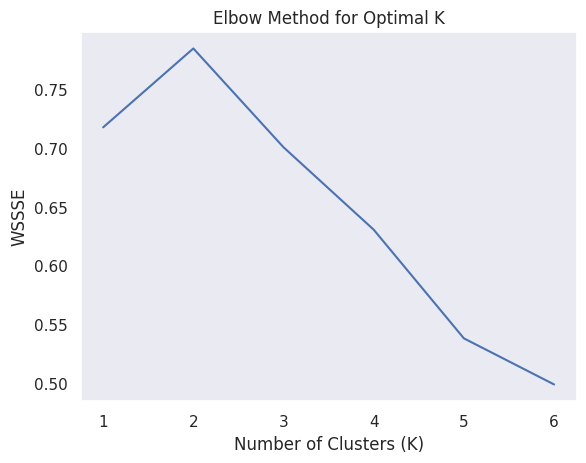

In [ ]:
# Plotting WSSSE values
plt.plot(range(1, 7), wssse_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSSSE')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

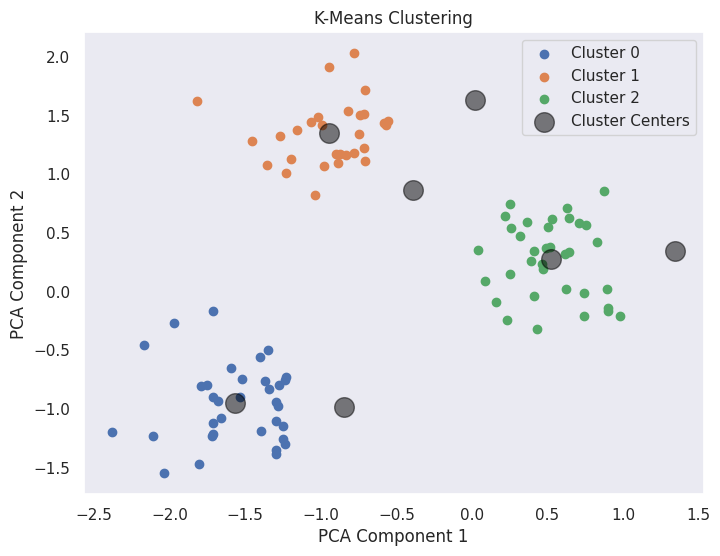

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(3):
  cluster_data = predictions.filter(predictions['cluster'] == i).select('scaled_features').collect()
  cluster_points = [point[0] for point in cluster_data]
  plt.scatter(*zip(*cluster_points), label=f"Cluster {i}")

plt.scatter(*zip(*model.clusterCenters()), c='black', s=200, alpha=0.5, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

+---+------------------+-------------------+----------+--------------------+--------------------+
|id1|          feature1|           feature2|true_label|            features|     scaled_features|
+---+------------------+-------------------+----------+--------------------+--------------------+
| 26|-5.674429960964083|  10.04745567864892|         0|[-5.6744299609640...|[-1.0626021067519...|
| 29| 1.238264381313376|-1.6580860020410277|         1|[1.23826438131337...|[0.23187921066099...|
| 65|-6.332213028324228| -8.530706005462632|         2|[-6.3322130283242...|[-1.1857795321446...|
| 19|-2.518080946751552|-10.284102215049781|         2|[-2.5180809467515...|[-0.4715395444823...|
| 54|-6.575133096563175|  7.034714555112872|         0|[-6.5751330965631...|[-1.2312691016800...|
+---+------------------+-------------------+----------+--------------------+--------------------+
only showing top 5 rows

+---+------------------+-------------------+----------+--------------------+-----------------

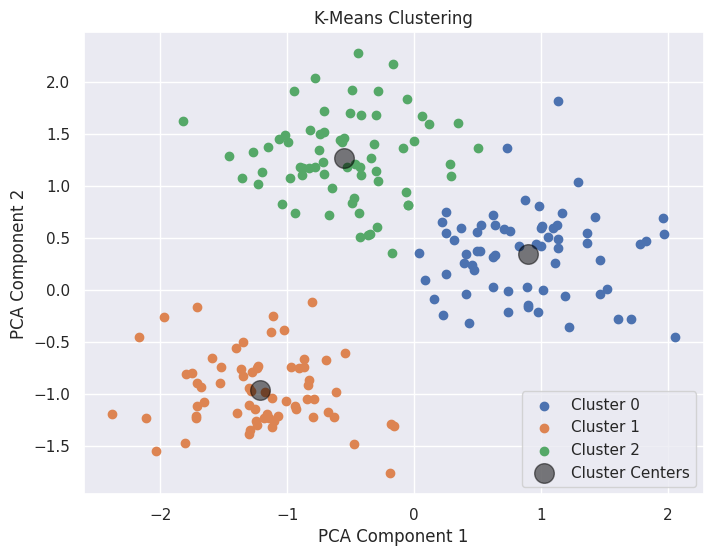

In [ ]:

assembler = VectorAssembler(inputCols=["feature1", "feature2"],
                            outputCol="features")
data_df = assembler.transform(df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)
data_df.show(5)


kmeans = KMeans(k=3, featuresCol="scaled_features", predictionCol="cluster")
model = kmeans.fit(data_df)


predictions = model.transform(data_df)
predictions.show(5)



evaluator = ClusteringEvaluator(predictionCol='cluster', featuresCol='scaled_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')

#evaluator = ClusteringEvaluator()
silhouette_score = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score:.4f}")


# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_data = predictions.filter(predictions["cluster"] == i).select("scaled_features").collect()
    cluster_points = [point[0] for point in cluster_data]
    plt.scatter(*zip(*cluster_points), label=f"Cluster {i}")

plt.scatter(*zip(*model.clusterCenters()), c='black', s=200, alpha=0.5, label="Cluster Centers")
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


## Software Engineering

### Procedural

In [ ]:
"""
An example of a simple procedural program. Asks the user for a URL,
retrieves the content of that URL (http:// or https:// required),
writes it to a temp-file, and repeats until the user tells it to
stop.
"""
import os
import urllib.request

if os.name == 'posix':
  tmp_dir = '/tmp/'
else:
  tmp_dir = 'C:\\Temp\\'

tmp_dir = ''

print('Simple procedural code example')

the_url = ''

while the_url.lower() != 'x':
  the_url = input('Please enter a URL to read, or "X" to cancel: ')
  if the_url and the_url.lower() != 'x':
    page = urllib.request.urlopen(the_url)
    page_data = page.read()
    page.close()
    #local_file = ('%s%s.data' % (tmp_dir, ''.join([c for c in the_url if c not in ':/']))).replace('https', '').replace('http', '')
    local_file = f"{tmp_dir}{''.join([c for c in the_url if c not in ':/'])}.data".replace('https', '').replace('http', '')
    print(f'local_file: {local_file}')
    with open(local_file, 'w') as out_file:
      out_file.write(str(page_data))
      print(f"Page-data written to {local_file}")

print('Exiting. Thanks!')

Simple procedural code example
Please enter a URL to read, or "X" to cancel: https://ru.ac.za
local_file: ru.ac.za.data
Page-data written to ru.ac.za.data
Please enter a URL to read, or "X" to cancel: X
Exiting. Thanks!


## Object Oriented Approach

In [ ]:
"""
An example of a simple OOP-based program. Asks the user for a URL,
retrieves the content of that URL, writes it to a temp-file, and
repeats until the user tells it to stop.
"""

# Importing stuff we'll use
import os

import urllib.request

if os.name == 'posix':
  tmp_dir = '/tmp/'
else:
  tmp_dir = 'C:\\Temp\\'

tmp_dir = 'tmp'

if not os.path.exists(tmp_dir):
  os.mkdir(tmp_dir)


# Defining the class
class PageReader:
  # Object-initialization method
  def __init__(self, url):
    self.url = url
    url_characters = ''.join([c for c in url if c not in ':/'])
    self.local_file = f'{tmp_dir}{url_characters}.data'.replace('https', '').replace('http', '')
    self.page_data = self.get_page_data()

  # Method to read the data from the URL
  def get_page_data(self):
    page = urllib.request.urlopen(self.url)
    page_data = page.read()
    page.close()
    return page_data

  # Method to save the page-data
  def save_page_data(self):
    with open(self.local_file, 'w') as out_file:
      out_file.write(str(self.page_data))
      print(f"Page-data written to {self.local_file}")

if __name__ == '__main__':
  print("Object-oriented code example")
  # Almost the same loop...
  the_url = ''
  while the_url.lower() != 'x':
    the_url = input('Please enter a URL to read, or "X" to cancel: ')
    if the_url and the_url.lower() != 'x':
      page_reader = PageReader(the_url)
      page_reader.save_page_data()

  print('Exiting. Thanks!')

Object-oriented code example
Please enter a URL to read, or "X" to cancel: https://RU.AC.ZA
Page-data written to tmpRU.AC.ZA.data
Please enter a URL to read, or "X" to cancel: X
Exiting. Thanks!


In [ ]:
## Using the requests module
import os
import requests

tmp_dir = ''

class PageReader:
  def __init__(self, url):
    self.url = url
    url_characters = ''.join([c for c in url if c not in ':/'])
    self.local_file = f'{tmp_dir}{url_characters}.data'.replace('https', '').replace('http', '')
    self.page_data = self.get_page_data()

  def get_page_data(self):
    response = requests.get(self.url)
    response.raise_for_status()  # Raise an error for bad responses
    return response.text

  def save_page_data(self):
    with open(self.local_file, 'w') as out_file:
      out_file.write(self.page_data)
      print(f"Page-data written to {self.local_file}")

if __name__ == '__main__':
  print("Object-oriented code example")
  the_url = ''
  while the_url.lower() != 'x':
    the_url = input("Please enter a URL to read, or 'X' to cancel: ")
    if the_url and the_url.lower() != 'x':
      page_reader = PageReader(the_url)
      page_reader.save_page_data()

  print('Exiting. Thanks!')

Object-oriented code example
Please enter a URL to read, or 'X' to cancel: https://ru.ac.za
Page-data written to ru.ac.za.data
Please enter a URL to read, or 'X' to cancel: X
Exiting. Thanks!


In [ ]:
res = requests.get('https://www.google.com')
res.raise_for_status()

In [ ]:
res.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="5B21MQqtL_BEkuakW89Wwg">(function(){var _g={kEI:\'eDXxZr32KK6A0PEPvZ-xqAY\',kEXPI:\'0,3700334,615,432,3,48,538613,2872,2891,8348,98968,162095,342,23024,6700,41945,84374,8155,23351,8702,13733,9779,62657,36747,3801,2412,33249,15816,1804,7734,6626,1,6651,4820,9437,11813,1635,13493,15783,12990,14093,5212676,996,147,3,5991284,2841175,190,305,107,27,3,1,5,7440383,16496230,2861629,1182080,16672,43887,3,1603,3,2124363,23034776,2529,1,208,4636,16436,84045,11729,10893,885,14280,8182,49

In [ ]:
res = requests.get('http://google.com')
res.raise_for_status()
res.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world\'s information, including webpages, images, videos and more. Google has many special features to help you find exactly what you\'re looking for." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="zsXC4EC4FDYYAukiDyVCuw">(function(){var _g={kEI:\'ejXxZsOXPOSm0PEPgpjF-A4\',kEXPI:\'0,793110,2907190,642,439,3,48,538613,2872,2891,8348,34680,30022,6397,27869,162095,342,23024,6700,41942,68702,13669,2006,8155,8860,14491,8701,13734,9779,62658,6049,30697,3801,2412,33249,15816,1804,7734,18098,575,8861,11814,1633,29278,27083,5212676,998,138,7,3,57,5991227,2841102,263,305,134,3,5,1,7440383,19357859,1182080,16672,43887,3,1603,3,2124363,23029351,8163,4636,11731,4705,8075,2,13950,127

In [ ]:
''.join([c for c in 'https://www.google.com' if c not in ':/'])

'httpswww.google.com'

## Functional approach

In [ ]:
import os
import urllib.request

def get_page_data(url):
  page = urllib.request.urlopen(url)
  page_data = page.read()
  page.close()
  return page_data

def save_page_data(local_file, page_data):
  with open(local_file, 'w') as out_file:
    out_file.write(str(page_data))
    return f'Page-data written to {local_file}'

def get_local_file_path(url):
  url_characters = ''.join([c for c in url if c not in ':/'])
  return f'{tmp_dir}{url_characters}.data'.replace('https', '').replace('http', '')

def process_page(url):
  return save_page_data(get_local_file_path(url), get_page_data(url))

def get_page_to_process():
  the_url = input('Please enter a URL to read, or "X" to cancel: ')
  if the_url:
    return the_url.lower()
  return None

if __name__ == '__main__':
  print('Functional-Programming code example')
  # Again, almost the same loop...
  the_url = get_page_to_process()
  while the_url not in ('x', None):
    print(process_page(the_url))
    the_url = get_page_to_process()
  print('Exiting. Thanks!')

Functional-Programming code example
Please enter a URL to read, or "X" to cancel: https://ru.ac.za
Page-data written to ru.ac.za.data
Please enter a URL to read, or "X" to cancel: X
Exiting. Thanks!


In [ ]:
%%writefile setup.cfg
[pycodestyle]
max-line-length = 95
statistics = True
# We allow redefinition of names because we need to do so
# for inline testing at times
ignore = F811

[flake8]
max-line-length = 95
statistics = True
# We allow redefinition of names because we need to do so
# for inline testing at times
extend-ignore = F811

Writing setup.cfg


In [ ]:
%%writefile help_function_example.py
from typing import Any


def example_function(
    str_arg: str,
    int_arg: int,
    float_arg: float,
    bool_arg: bool,
    list_arg: list[Any],
    dict_arg: dict[str, Any],
    *args: int | float,
    **kwargs: Any
) -> None:
    """
    An example function.

    Parameters:
    -----------
    str_arg : str
        A string value that is used for something.
    int_arg : int
        An integer value that is used for something.
    float_arg : float
        A floating-point value that is used for something.
    bool_arg : bool
        A boolean value that indicates something.
    list_arg : list[Any]
        A list of things.
    dict_arg : dict[str, Any]
        A dictionary of things
    *args : int | float
        The argument-list for the function.
    **kwargs : Any
        The keyword arguments for the function.
    """
    ...


help(example_function)

Writing help_function_example.py


In [ ]:
%run help_function_example.py

Help on function example_function in module __main__:

example_function(str_arg: str, int_arg: int, float_arg: float, bool_arg: bool, list_arg: list[typing.Any], dict_arg: dict[str, typing.Any], *args: int | float, **kwargs: Any) -> None
    An example function.
    
    Parameters:
    -----------
    str_arg : str
        A string value that is used for something.
    int_arg : int
        An integer value that is used for something.
    float_arg : float
        A floating-point value that is used for something.
    bool_arg : bool
        A boolean value that indicates something.
    list_arg : list[Any]
        A list of things.
    dict_arg : dict[str, Any]
        A dictionary of things
    *args : int | float
        The argument-list for the function.
    **kwargs : Any
        The keyword arguments for the function.



In [ ]:
%%writefile docstrings_example_basic.py
from __future__ import annotations

import abc


def find_customers(
    given_name=None, family_name=None
) -> list[Customer]:
    """
    Finds and returns a list of Customer objects.

    Connects to the back-end data-store and executes a query
    to retrieve all customers whose given_name and/or family_name
    match the values supplied, in whole or in part.

    given_name : str | None
        The given_name value to use in the customer query.
    family_name : str | None
        The family_name value to use in the customer query.

    Raises an AssertionError if given_name and family_name
    are both None.
    """
    ...


def get_customer(customer_id) -> Customer:
    """
    Returns a Customer object for the Customer identified.

    customer_id : UUID | str
        The unique identifier of the customer to be retrieved.

    Raises a RuntimeError if no customer could be found with
    the specified customer ID.
    """
    ...


class BasePerson(metaclass=abc.ABCMeta):
    """
    ABC providing baseline functionality, interface requirements,
    and type-identity for objects that can represent a Person
    """

    def __init__(self, given_name, family_name):
        """
        Initializes a BasePerson-derived instance.

        given_name : str | None
            The given_name value to store in the instance's state.
        family_name : str | None
            The family_name value to store in the instance's state.
        """
        ...


class Customer(BasePerson):
    """
    Represents a Customer in the system.
    """

    def __init__(self, customer_id, given_name, family_name):
        """
        Initializes a Customer instance.

        customer_id : UUID | str
            The unique identifier of the customer to store in the
            instance's state.
            Will be converted to a UUID value if one is not provided.
        given_name : str | None
            The given_name value to store in the instance's state.
        family_name : str | None
            The family_name value to store in the instance's state.

        Raises a TypeError or ValueError if customer_id is not a
        UUID, and cannot be converted to one.
        """
        ...

Writing docstrings_example_basic.py


In [ ]:
!pip install yfinance pandas_datareader --quiet

In [ ]:
import yfinance as yf

Downloading the historical data for the TESLA stock price by using the method `download` and passing the ticker `TSLA`

In [ ]:
data = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [ ]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  3582.000000  3582.000000  3582.000000  3582.000000  3582.000000   
mean     76.957397    78.646596    75.163260    76.939771    76.939771   
std     102.992662   105.282647   100.507290   102.920658   102.920658   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.746334    12.031500    11.416000    11.809000    11.809000   
50%      17.569334    17.815333    17.312000    17.549666    17.549666   
75%     169.047501   174.177502   166.544998   170.022499   170.022499   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.582000e+03  
mean   9.678737e+07  
std    7.830241e+07  
min    1.777500e+06  
25%    4.821750e+07  
50%    8.203705e+07  
75%    1.225157e+08  
max    9.140820e+08

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(
    data,
    x=data.index,
    y='Close',
    title='TESLA Data from Yahoo Finance'
)

fig.show()

In [ ]:
import pandas_datareader as pdr

In [ ]:
data = pdr.get_data_fred('GS30')

In [ ]:
data.head()

GS30
DATE            
2019-10-01  2.19
2019-11-01  2.28
2019-12-01  2.30
2020-01-01  2.22
2020-02-01  1.97

In [ ]:
fig = px.line(data, x=data.index, y='GS30', title='GS30')
fig.show()

## Fetching Data from APIs

In [ ]:
!pip install requests --quiet

In [ ]:
import requests

In [ ]:
# Define the API endpoint from which you want to request the data
# For this example, we are going to use an URL to get Github's
# public timeline
url = 'https://api.github.com/events'

In [ ]:
# Submit a request by using the method `get`
response = requests.get(url=url)
type(response)

requests.models.Response

In [ ]:
print(response.status_code)

200


In [ ]:
# Parse the response content using `text`.
# This will simply show the result as a string.
response.text

'[{"id":"42169810242","type":"PushEvent","actor":{"id":6113223,"login":"Srinath91","display_login":"Srinath91","gravatar_id":"","url":"https://api.github.com/users/Srinath91","avatar_url":"https://avatars.githubusercontent.com/u/6113223?"},"repo":{"id":715926109,"name":"Srinath91/v1.2.0-logs","url":"https://api.github.com/repos/Srinath91/v1.2.0-logs"},"payload":{"repository_id":715926109,"push_id":20363582919,"size":1,"distinct_size":1,"ref":"refs/heads/api.lokal.in-Retail-logs-23-09-2024","head":"9b46c0edae1389f6f0af1dd31fdcb952a717bb0b","before":"5a4461ec0760ae855b0737729a777ca7335f26a9","commits":[{"sha":"9b46c0edae1389f6f0af1dd31fdcb952a717bb0b","author":{"email":"sri.srinath91@gmail.com","name":"Srinath91"},"message":"Delete api.lokal.in/Flow3 directory","distinct":true,"url":"https://api.github.com/repos/Srinath91/v1.2.0-logs/commits/9b46c0edae1389f6f0af1dd31fdcb952a717bb0b"}]},"public":true,"created_at":"2024-09-23T09:27:36Z"},{"id":"42169810229","type":"DeleteEvent","actor":{"i

In [ ]:
result = response.json()
type(result)

list

In [ ]:
result

[{'id': '42169810242',
  'type': 'PushEvent',
  'actor': {'id': 6113223,
   'login': 'Srinath91',
   'display_login': 'Srinath91',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/Srinath91',
   'avatar_url': 'https://avatars.githubusercontent.com/u/6113223?'},
  'repo': {'id': 715926109,
   'name': 'Srinath91/v1.2.0-logs',
   'url': 'https://api.github.com/repos/Srinath91/v1.2.0-logs'},
  'payload': {'repository_id': 715926109,
   'push_id': 20363582919,
   'size': 1,
   'distinct_size': 1,
   'ref': 'refs/heads/api.lokal.in-Retail-logs-23-09-2024',
   'head': '9b46c0edae1389f6f0af1dd31fdcb952a717bb0b',
   'before': '5a4461ec0760ae855b0737729a777ca7335f26a9',
   'commits': [{'sha': '9b46c0edae1389f6f0af1dd31fdcb952a717bb0b',
     'author': {'email': 'sri.srinath91@gmail.com', 'name': 'Srinath91'},
     'message': 'Delete api.lokal.in/Flow3 directory',
     'distinct': True,
     'url': 'https://api.github.com/repos/Srinath91/v1.2.0-logs/commits/9b46c0edae1389f6f0af1dd31fd

In [ ]:
result[0]

{'id': '42169810242',
 'type': 'PushEvent',
 'actor': {'id': 6113223,
  'login': 'Srinath91',
  'display_login': 'Srinath91',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/Srinath91',
  'avatar_url': 'https://avatars.githubusercontent.com/u/6113223?'},
 'repo': {'id': 715926109,
  'name': 'Srinath91/v1.2.0-logs',
  'url': 'https://api.github.com/repos/Srinath91/v1.2.0-logs'},
 'payload': {'repository_id': 715926109,
  'push_id': 20363582919,
  'size': 1,
  'distinct_size': 1,
  'ref': 'refs/heads/api.lokal.in-Retail-logs-23-09-2024',
  'head': '9b46c0edae1389f6f0af1dd31fdcb952a717bb0b',
  'before': '5a4461ec0760ae855b0737729a777ca7335f26a9',
  'commits': [{'sha': '9b46c0edae1389f6f0af1dd31fdcb952a717bb0b',
    'author': {'email': 'sri.srinath91@gmail.com', 'name': 'Srinath91'},
    'message': 'Delete api.lokal.in/Flow3 directory',
    'distinct': True,
    'url': 'https://api.github.com/repos/Srinath91/v1.2.0-logs/commits/9b46c0edae1389f6f0af1dd31fdcb952a717bb0b'}]},
 'pu

In [ ]:
NASA_KEY = "I1WqTFs9LZ1SETUdkgpCIHlONpBWdhUPD2meJBYg"

In [ ]:
params = {'api_key': NASA_KEY}
response = requests.get('https://api.nasa.gov/planetary/apod', params=params)

In [ ]:
response

<Response [200]>

In [ ]:
response.json()

{'copyright': '\nBrian Valente\n& Greg Stein\n',
 'date': '2024-09-23',
 'explanation': 'What will happen as this already bright comet approaches?  Optimistic predictions have Comet C/2023 A3 (Tsuchinshan–ATLAS) briefly becoming easily visible to the unaided eye -- although the future brightness of comets are notoriously hard to predict, and this comet may even break up in warming sunlight. What is certain is that the comet is now unexpectedly bright and is on track to pass its closest to the Sun (0.39 AU) later this week and closest to the Earth (0.47 AU) early next month.  The featured image was taken in late May as Comet Tsuchinshan–ATLAS, discovered only last year, passed nearly in front of two distant galaxies.  The comet can now be found with binoculars in the early morning sky rising just before the Sun, while over the next few weeks it will brighten as it moves to the early evening sky.   Your Sky Surprise: What picture did APOD feature on your birthday? (post 1995)',
 'hdurl':

### Exploring the Iris Data Set

In [ ]:
import plotly.express as px

In [ ]:
iris = px.data.iris()
type(iris)

pandas.core.frame.DataFrame

In [ ]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [ ]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species  \
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
145           3  
146           3  
147           3  
148           3  
149           3

In [ ]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width  species_id
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    2.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    1.000000
25%        5.100000     2.800000      1.600000     0.300000    1.000000
50%        5.800000     3.000000      4.350000     1.300000    2.000000
75%        6.400000     3.300000      5.100000     1.800000    3.000000
max        7.900000     4.400000      6.900000     2.500000    3.000000

In [ ]:
fig = px.scatter(
    iris,
    x='petal_length',
    y='petal_width'
)

fig.show()

In [ ]:
fig = px.scatter(
    iris,
    x='petal_length',
    y='petal_width',
    color='species'
)

fig.show()

In [ ]:
fig = px.scatter(
    iris,
    x='sepal_length',
    y='sepal_width',
    color='species'
)

fig.show()

### Exploring the Gapminder Data set

In [ ]:
gapminder = px.data.gapminder()
type(gapminder)

pandas.core.frame.DataFrame

In [ ]:
gapminder.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [ ]:
gapminder.tail()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716

In [ ]:
gapminder.describe()

year      lifeExp           pop      gdpPercap      iso_num
count  1704.00000  1704.000000  1.704000e+03    1704.000000  1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081   425.880282
std      17.26533    12.917107  1.061579e+08    9857.454543   248.305709
min    1952.00000    23.599000  6.001100e+04     241.165876     4.000000
25%    1965.75000    48.198000  2.793664e+06    1202.060309   208.000000
50%    1979.50000    60.712500  7.023596e+06    3531.846989   410.000000
75%    1993.25000    70.845500  1.958522e+07    9325.462346   638.000000
max    2007.00000    82.603000  1.318683e+09  113523.132900   894.000000

In [ ]:
fig = px.scatter(
    gapminder[gapminder.year == 1952],
    x='gdpPercap',
    y='lifeExp',
)

fig.show()

In [ ]:
fig = px.scatter(
    gapminder[gapminder.year == 2007],
    x='gdpPercap',
    y='lifeExp')

fig.show()

In [ ]:
fig = px.scatter(
    gapminder[gapminder.year == 2007],
    x='gdpPercap',
    y='lifeExp',
    color='continent')

fig.show()

### Loading the Plotly Express Data Sets

Plotly express comes with several datasets pre-loaded which we can use for testing and exploration purposes. In this recipe we will learn to load such data sets.

In [ ]:
import plotly

In [ ]:
plotly.__version__

'5.24.1'

In [ ]:
import plotly.express.data as datasets

In [ ]:
for name in dir(datasets):
  if '__' not in name:
    print(name)

carshare
election
election_geojson
experiment
gapminder
iris
medals_long
medals_wide
stocks
tips
wind


In [ ]:
data = datasets.stocks()
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

In [ ]:
data.tail()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

In [ ]:
!pip install latexify-py --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import math # Optionally
import numpy as np
import latexify

latexify.__version__

'0.4.3.post1'

In [ ]:
@latexify.function
def solve(a, b, c):
  return (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

print(solve(1, 4, 3))
print(solve)

solve

-1.0
\mathrm{solve}(a, b, c) = \frac{-b + \sqrt{ b^{2} - 4 a c }}{2 a}


In [ ]:
solve(1, 4, 3)

-1.0

In [ ]:
@latexify.expression
def solve(a, b, c):
  return (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

solve

In [ ]:
@latexify.algorithmic
def solve(a, b, c):
  return (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

In [ ]:
solve

In [ ]:
# latexify.get_latex obtains the underlying LaTeX expression directly.
def solve(a, b, c):
  return (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)

latexify.get_latex(solve)

'\\mathrm{solve}(a, b, c) = \\frac{-b + \\sqrt{ b^{2} - 4 a c }}{2 a}'

In [ ]:
@latexify.function
def sinc(x):
  if x == 0:
    return 1
  else:
    return math.sin(x) / x

sinc

In [ ]:
@latexify.function
def fib(x):
  if x == 0:
    return 0
  elif x == 1:
    return 1
  else:
    return fib(x - 1) + fib(x - 2)

fib

In [ ]:
# Some math symbols are converted automatically.
@latexify.function(use_math_symbols=True)
def greek(alpha, beta, gamma, Omega):
  return alpha * beta + math.gamma(gamma) + Omega

greek

In [ ]:
# Function names, arguments, variables can be replaced.
identifiers = {
    'my_function': 'f',
    'my_inner_function': 'g',
    'my_argument': 'x'
}

@latexify.function(identifiers=identifiers)
def my_function(my_argument):
  return my_inner_function(my_argument)

my_function

In [ ]:
# Assignments can be reduced into one expression.
@latexify.function(reduce_assignments=True)
def f(a, b, c):
  discriminant = b**2 - 4*a*c
  numerator = -b + math.sqrt(discriminant)
  denominator = 2*a
  return numerator / denominator

f

In [ ]:
# Matrix support.
@latexify.function(reduce_assignments=True, use_math_symbols=True)
def transform(x, y, a, b, theta, s, t):
  cos_t = math.cos(theta)
  sin_t = math.sin(theta)
  scale = np.array([[a, 0, 0],
                    [0, b, 0],
                    [0, 0, 1]])

  rotate = np.array([[cos_t, -sin_t, 0],
                     [sin_t, cos_t, 0],
                     [0, 0, 1]])

  move = np.array([[1, 0, s],
                   [0, 1, t],
                   [0, 0, 1]])

  return move @ rotate @ scale @ np.array([[x], [y], [1]])

transform


In [ ]:
@latexify.algorithmic
def fib(x):
  if x == 0:
    return 0
  elif x == 1:
    return 1
  else:
    return fib(x - 1) + fib(x - 2)

fib

In [ ]:
@latexify.algorithmic
def collatz(x):
  n = 0
  while x > 1:
    n = n + 1
    if x % 2 == 0:
      x = x // 2
    else:
      x = 3 * x + 1
  return n

collatz

__Data engineering__ is the discipline of designing, building, and maintaining systems and infrastructure for collecting, storing, and analysing data.


Data analysis is a cornerstone of data engineering, underpinning the processes and systems that enable organisations to harness the power of their data. By integrating robust data analysis techniques into their workflows, data engineers ensure that data is not only stored and managed effectively but also transformed into actionable insights that drive business success.

_In conclusion, data analysis is a multi-faceted process that transforms raw data into valuable insights. It involves defining the problem, collecting and cleaning data, exploring and visualising data, and effectively communicating the results. Its importance spans across various fields, driving innovation and efficiency, and it plays a crucial role in the work of data engineers. By understanding and mastering the data analysis process, professionals can unlock the full potential of data and drive meaningfull change in their organisations._

In [ ]:
import pandas as pd

# Create a Series from a list
data = [10, 20, 30, 40]
my_series = pd.Series(data)
my_series

0    10
1    20
2    30
3    40
dtype: int64

In [ ]:
# Create a Series from a dictionary (index becomes the label)
data = {"name": 'Alice', "age": 25, "city": 'New York'}
my_series = pd.Series(data)
my_series

name       Alice
age           25
city    New York
dtype: object

In [ ]:
# Create a DataFrame from a dictionary of lists
data = {
    "name": ["Alice", "Bob", "Charlie"],
    "age": [30, 25, 40],
    "city": ["New York", "London", "Paris"]
}

my_dataframe = pd.DataFrame(data)
my_dataframe

name  age      city
0    Alice   30  New York
1      Bob   25    London
2  Charlie   40     Paris

In [ ]:
# Create a DataFrame from a list of dictionaries
data = [
    {"name": "Alice", "age": 30, "city": "New York"},
    {"name": "Bob", "age": 25, "city": "London"},
    {"name": "Charlie", "age": 40, "city": "Paris"}
]

my_dataframe = pd.DataFrame(data)
my_dataframe

name  age      city
0    Alice   30  New York
1      Bob   25    London
2  Charlie   40     Paris

In [ ]:
my_dataframe[my_dataframe.age > 30]

name  age   city
2  Charlie   40  Paris

In [ ]:
sorted_df = my_dataframe.sort_values(by='age', ascending=False)
sorted_df

name  age      city
2  Charlie   40     Paris
0    Alice   30  New York
1      Bob   25    London

In [ ]:
emp_df = pd.read_csv("https://raw.githubusercontent.com/behnamyazdan/PythonForDataEngineeringCourse/refs/heads/main/02-DataManipulationAndAnalysis/datasets/employees.csv")
emp_df.head()

EmployeeID          Name   Department  Age  Salary
0           1    John Smith  Engineering   28   75000
1           2      Jane Doe    Marketing   34   65000
2           3  Mike Johnson  Engineering   40   85000
3           4   Emily Davis           HR   25   55000
4           5    Anna Brown  Engineering   30   72000

In [ ]:
house_df = pd.read_csv("https://raw.githubusercontent.com/behnamyazdan/PythonForDataEngineeringCourse/refs/heads/main/02-DataManipulationAndAnalysis/datasets/house_price.csv")

In [ ]:
house_df.head()

price  size  bedrooms
0  250000  1400         3
1  300000  1600         3
2  350000  1800         3
3  400000  2000         4
4  450000  2200         4

In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/behnamyazdan/PythonForDataEngineeringCourse/refs/heads/main/02-DataManipulationAndAnalysis/datasets/orders.csv")

In [ ]:
orders_df.head()

order_id  customer_id  product_id                  product_name  \
0      1001         2001        3001            Men's Cotton Shirt   
1      1002         2002        3002  Gaming Laptop (i7 Processor)   
2      1003         2003        3003     Box of Pencils (12 count)   
3      1004         2004        3004           Fresh Apples (1 kg)   
4      1005         2005        3005                    Travel Mug   

      category   price  order_date           city country  
0     clothing   24.99  2023-05-01       New York     USA  
1  electronics  899.99  2023-05-02    Los Angeles     USA  
2   stationery    2.50  2023-05-03        Chicago     USA  
3      grocery    5.99  2023-05-04  San Francisco     USA  
4         home  -19.95  2023-05-05         Austin     USA

In [ ]:
pinfo_df = pd.read_csv("https://raw.githubusercontent.com/behnamyazdan/PythonForDataEngineeringCourse/refs/heads/main/02-DataManipulationAndAnalysis/datasets/personal_info.csv")

In [ ]:
pinfo_df.head()

Name   Age  Phone Number           City
0  Name 0  28.0   11234567890       New York
1  Name 1  32.0   12234567890    Los Angeles
2  Name 2  19.0   13234567890        Chicago
3  Name 3   NaN   14234567890  San Francisco
4  Name 4  45.0   15234567890         Austin

In [ ]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/behnamyazdan/PythonForDataEngineeringCourse/refs/heads/main/02-DataManipulationAndAnalysis/datasets/sales_data.csv")

In [ ]:
sales_df.head()

Date  Product_ID  Quantity  Revenue
0  2022-01-01        1001         5     50.0
1  2022-01-02        1002         3     30.0
2  2022-01-03        1001         2     20.0
3  2022-01-04        1003         1     10.0
4  2022-01-05        1002         4     40.0

In [ ]:
sales_df.Revenue.mean()

31.0

In [ ]:
sales_df.Revenue.median()

30.0

In [ ]:
sales_df.Revenue.std(

)

16.6332999331662

In [ ]:
sales_df.Revenue.mode()

0    10.0
1    20.0
2    30.0
3    40.0
Name: Revenue, dtype: float64

In [ ]:
sales_df.Revenue.mode()[0]

10.0

In [ ]:
range = sales_df.Revenue.max() - sales_df.Revenue.min()
range

50.0

In [ ]:
sales_df.Revenue.var()

276.6666666666667

In [ ]:
p25 = sales_df.Revenue.quantile(0.25)
p25

20.0

In [ ]:
p50 = sales_df.Revenue.quantile(0.5)
p50

30.0

In [ ]:
p75 = sales_df.Revenue.quantile(0.75)
p75

40.0

In [ ]:
skewness = sales_df.Revenue.skew()


In [ ]:
skewness

0.3476840166026902

In [ ]:
kurtosis = sales_df.Revenue.kurtosis()
kurtosis

-0.7210252369201418

In [ ]:
sales_df.Revenue.kurt()

-0.7210252369201418

In [ ]:
import scipy.stats as stats


In [ ]:
confidence_interval = stats.norm.interval(
    0.95,
    loc=sales_df.Revenue.mean(),
    scale=sales_df.Revenue.std()
)

confidence_interval

(-1.6006688130582418, 63.60066881305824)

### Hypothesis Testing

A method of making statistical decisions using experimental data. It includes tests like _t-test_, _chi-square tests_, and _ANOVA_.

In [ ]:
sales_df.head()

Date  Product_ID  Quantity  Revenue
0  2022-01-01        1001         5     50.0
1  2022-01-02        1002         3     30.0
2  2022-01-03        1001         2     20.0
3  2022-01-04        1003         1     10.0
4  2022-01-05        1002         4     40.0

In [ ]:
t_stat, p_value = stats.ttest_ind(sales_df.Quantity, sales_df.Revenue)

In [ ]:
t_stat

-5.27794788399409

In [ ]:
p_value

5.1074259677905656e-05

In [ ]:
correlation = sales_df.Revenue.corr(sales_df.Quantity)
correlation

0.9999999999999999

In [ ]:
from sklearn.linear_model import LinearRegression

X = sales_df[['Quantity']]
y = sales_df['Revenue']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
df = house_df

In [ ]:
df.describe()

price         size   bedrooms
count      24.000000    24.000000  24.000000
mean   437500.000000  2150.000000   3.875000
std    176776.695297   707.106781   1.075922
min    150000.000000  1000.000000   2.000000
25%    293750.000000  1575.000000   3.000000
50%    437500.000000  2150.000000   4.000000
75%    581250.000000  2725.000000   5.000000
max    725000.000000  3300.000000   5.000000

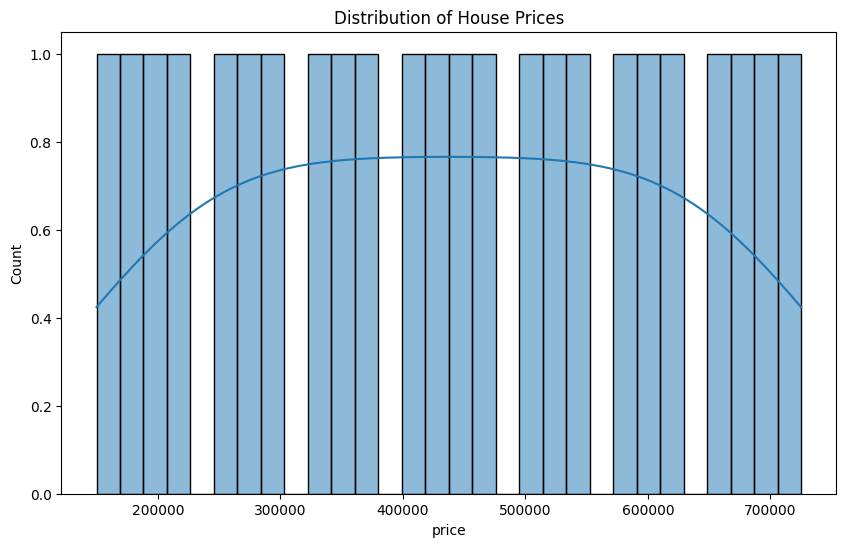

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()

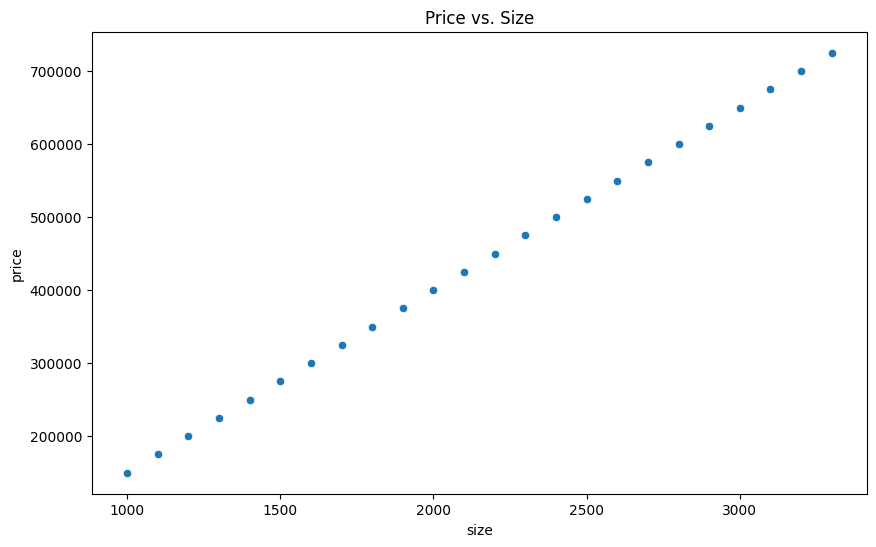

In [ ]:
# Scatter Plot of Price vs. size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size', y='price')
plt.title('Price vs. Size')
plt.show()

In [ ]:
correlation = df['price'].corr(df['size'])
correlation

1.0

In [ ]:
t_stat, p_value = stats.ttest_ind(df[df['bedrooms'] == 3]['price'],
                                  df[df['bedrooms'] == 4]['price'])

print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -5.5549205986353085, P-value: 0.0002424308244322484


In [ ]:
import pandas as pd

data = [10, 20, 30, 40]
my_series = pd.Series(data)
my_series

0    10
1    20
2    30
3    40
dtype: int64

In [ ]:
import numpy as np

data = np.array([10, 20, 30, 40])
my_series = pd.Series(data)
my_series

0    10
1    20
2    30
3    40
dtype: int64

In [ ]:
data = {'name': 'Alice', 'age': 30, 'city': 'New York'}
my_series = pd.Series(data)
my_series

name       Alice
age           30
city    New York
dtype: object

In [ ]:
import pandas as pd

data = {"name": "Alice", "age": 30, "city": "New York"}
my_series = pd.Series(data)

name = my_series["name"]
print(name)  # Output: Alice

Alice


In [ ]:
my_series[1:2]

age    30
dtype: object

In [ ]:
my_series[:2]

name    Alice
age        30
dtype: object

In [ ]:
import pandas as pd

# Creating a sample Series
data = {"name": "Alice", "age": 30, "city": "New York"}
my_series = pd.Series(data)

print(my_series)

# Convert elements to numeric, coercing errors to NaN
numeric_series = pd.to_numeric(my_series, errors='coerce')

numeric_series

name       Alice
age           30
city    New York
dtype: object


name     NaN
age     30.0
city     NaN
dtype: float64

In [ ]:
# Filter out NaN values (non-numeric elements)
numeric_only_series = numeric_series.dropna()
numeric_only_series

age    30.0
dtype: float64

In [ ]:
# Apply the condition to filter elements greater than 25
filtered_series = numeric_only_series[numeric_only_series > 25]
filtered_series

age    30.0
dtype: float64

In [ ]:
my_series = pd.to_numeric(my_series, errors='coerce')
my_series

name     NaN
age     30.0
city     NaN
dtype: float64

In [ ]:
# Add a constant value
added_series = my_series + 5
print(added_series)

# Multiply two Series with compatible indices
data2 = {"name": "Bob", "age": 20, "city": "London"}
series2 = pd.Series(data2)
multiplied_series = my_series * series2
print(multiplied_series)  # Note: Only elements with matching indices are multiplied

name     NaN
age     35.0
city     NaN
dtype: float64
name      NaN
age     600.0
city      NaN
dtype: object


In [ ]:
35 * 60

2100

In [ ]:
print(my_series.mean())
print(my_series.median())
print(my_series.std())

30.0
30.0
nan


In [ ]:
sorted_series = my_series.sort_values(ascending=False)  # Sorts by age in descending order
print(sorted_series)

age     30.0
name     NaN
city     NaN
dtype: float64


In [ ]:
my_series

name     NaN
age     30.0
city     NaN
dtype: float64

In [ ]:
my_series.city

nan

In [ ]:
import pandas as pd

# Creating a sample Series with a missing value
data = {"name": "Alice", "age": None, "city": "New York"}  # Notice 'age' is None
my_series = pd.Series(data)

print("Original Series:")
print(my_series)

Original Series:
name       Alice
age         None
city    New York
dtype: object


In [ ]:
my_series = my_series.fillna({'age': 25})
my_series

name       Alice
age         25.0
city    New York
dtype: object

## Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

### Chapter 6

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))

In [ ]:
try:
  import google.colab
  import requests
  url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
  r = requests.get(url, allow_redirects=True)
  open('config.py', 'wb').write(r.content)
except ModuleNotFoundError:
  pass

from config import *
config_chapter6()
# This is needed to render the plots in this chapter
from plots.chapter6 import *

Finished!


In [ ]:
import numpy as np
from PIL import Image
from copy import deepcopy

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.transforms.v2 import Compose, ToImage, Normalize, ToPILImage, Resize, ToDtype
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, MultiStepLR, CyclicLR, LambdaLR

from stepbystep.v2 import StepByStep
from data_generation.rps import download_rps

## Rock Paper Scissors Dataset

In [ ]:
# This may take a couple of minutes...
download_rps()

rps folder already exists!
rps-test-set folder already exists!


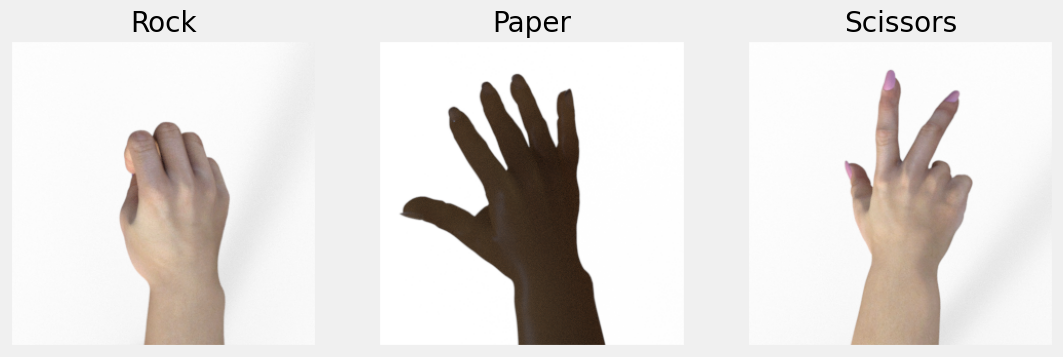

In [ ]:
fig = figure1()

## Data Preparation

### ImageFolder

In [ ]:
temp_transform = Compose([
    Resize(28),
    ToImage(),
    ToDtype(torch.float32, scale=True)
])

temp_dataset = ImageFolder(
    root='rps',
    transform=temp_transform
)

In [ ]:
temp_dataset.classes

['paper', 'rock', 'scissors']

In [ ]:
temp_dataset.class_to_idx

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
temp_dataset[0]

(Image([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9922]],
 
        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9922, 0.9922]],
 
        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 

In [ ]:
temp_dataset[0][0].shape, temp_dataset[0][1]

(torch.Size([3, 28, 28]), 0)

### Standardisation

In [ ]:
temp_loader = DataLoader(temp_dataset, batch_size=16)
temp_loader

In [ ]:
@staticmethod
def statistics_per_channel(images, labels):
  # NCHW
  n_samples, n_channels, n_height, n_weight = images.size()
  # Flatten HW into a single dimension
  flatten_per_channel = images.reshape(n_samples, n_channels, -1)

  # Computes statistics of each image per channel
  # Average pixel value per channel
  # (n_samples, n_channels)
  means = flatten_per_channel.mean(axis=2)
  # Standard deviation of pixel values per channel
  # (n_samples, n_channels)
  stds = flatten_per_channel.std(axis=2)

  # Adds up statistics of all images in a mini-batch
  # (1, n_channels)
  sum_means = means.sum(axis=0)
  sum_stds = stds.sum(axis=0)

  # Makes a tensor of shape (1, n_channels)
  # with the number of samples in the mini-batch
  n_samples = torch.tensor([n_samples] * n_channels).float()

  # Stack the three tensors on top of one another
  # (3, n_channels)
  return torch.stack([n_samples, sum_means, sum_stds], axis=0)

setattr(StepByStep, 'statistics_per_channel', statistics_per_channel)

In [ ]:
first_images, first_labels = next(iter(temp_loader))
StepByStep.statistics_per_channel(first_images, first_labels)

tensor([[16.0000, 16.0000, 16.0000],
        [13.8748, 13.3048, 13.1962],
        [ 3.0507,  3.8268,  3.9754]])

In [ ]:
results = StepByStep.loader_apply(temp_loader, StepByStep.statistics_per_channel)
results

tensor([[2520.0000, 2520.0000, 2520.0000],
        [2142.5356, 2070.0806, 2045.1444],
        [ 526.3025,  633.0677,  669.9556]])

In [ ]:
@staticmethod
def make_normalizer(loader):
  total_samples, total_means, total_stds = StepByStep.loader_apply(loader, StepByStep.statistics_per_channel)
  norm_mean = total_means / total_samples
  norm_std = total_stds / total_samples
  return Normalize(norm_mean, norm_std)

setattr(StepByStep, 'make_normalizer', make_normalizer)

In [ ]:
normalizer = StepByStep.make_normalizer(temp_loader)
normalizer

Normalize(mean=[tensor(0.8502), tensor(0.8215), tensor(0.8116)], std=[tensor(0.2089), tensor(0.2512), tensor(0.2659)], inplace=False)

### The Real Datasets

In [ ]:
composer = Compose(
    [Resize(28),
     ToImage(),
     ToDtype(torch.float32, scale=True),
     normalizer]
)

train_data = ImageFolder(root='rps', transform=composer)
val_data = ImageFolder(root='rps-test-set', transform=composer)

# Builds a loader of each set
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16)

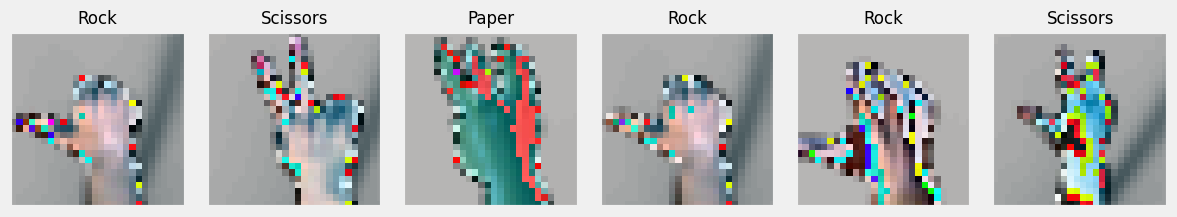

In [ ]:
torch.manual_seed(28)
first_images, first_labels = next(iter(train_loader))

fig = figure2(first_images, first_labels)

In [ ]:
regions = np.array([[[[5, 0, 8],
                      [1, 9, 5],
                      [6, 0, 2]],
                     [[0, 5, 4],
                      [8, 1, 9],
                      [4, 8, 1]],
                     [[4, 2, 0],
                      [6, 3, 0],
                      [5, 2, 8]]]])
regions.shape

(1, 3, 3, 3)

In [ ]:
three_channel_filter = np.array([[[[0, 3, 0],
                                   [1, 0, 1],
                                   [2, 1, 0]],
                                  [[2, 1, 0],
                                   [0, 3, 1],
                                   [1, -1, 0]],
                                  [[0, 1, 3],
                                   [-1, -2, 0],
                                   [2, 0, 1]]]])
three_channel_filter.shape

(1, 3, 3, 3)

In [ ]:
result = F.conv2d(torch.as_tensor(regions),
                  torch.as_tensor(three_channel_filter))

result

tensor([[[[39]]]])

In [ ]:
result.shape

torch.Size([1, 1, 1, 1])

In [ ]:
from sys import int_info
class CNN2(nn.Module):
  def __init__(self, n_feature, p=0.0):
    super(CNN2, self).__init__()
    self.n_feature = n_feature
    self.p = p
    # Creates the convolution layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=3)
    self.conv2 = nn.Conv2d(in_channels=n_feature, out_channels=n_feature, kernel_size=3)
    # Creates the linear layers
    # Where ro this 5 * 5 comes from?! Check it below
    self.fc1 = nn.Linear(in_features=n_feature * 5 * 5, out_features=50)
    self.fc2 = nn.Linear(in_features=50, out_features=3)
    # Creates dropout layers
    self.drop = nn.Dropout(self.p)

  def featurizer(self, x):
    # Featurizer
    # First convolution block
    # 3@28x28 -> n_feature@26x26 -> n_feature@13x13
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)
    # Second convolutional block
    # n_feature * @13x13 -> n_feature@11x11 -> n_feature@5x5
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2)
    # Input dimension (n_feature@5x5)
    # Output dimension (n_feature * 5 x 5)
    x = nn.Flatten()(x)
    return x

  def classifier(self, x):
    # Classifier
    # Hidden Layer
    # Input dimension (n_feature * 5 x 5)
    # Output dimension (50)
    if self.p > 0:
      x = self.drop(x)
    x = self.fc1(x)
    x = F.relu(x)
    # Output Layer
    # Input dimension (50)
    # Output dimension (3)
    if self.p > 0:
      x = self.drop(x)
    x = self.fc2(x)
    return x

  def forward(self, x):
    x = self.featurizer(x)
    x = self.classifier(x)
    return x

In [ ]:
dropping_model = nn.Sequential(nn.Dropout(p=0.5))
dropping_model

Sequential(
  (0): Dropout(p=0.5, inplace=False)
)

In [ ]:
spaced_points = torch.linspace(.1, 1.1, 11)
spaced_points

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000])

In [ ]:
torch.manual_seed(44)

dropping_model.train()
output_train = dropping_model(spaced_points)
output_train

tensor([0.0000, 0.4000, 0.0000, 0.8000, 0.0000, 1.2000, 1.4000, 1.6000, 1.8000,
        0.0000, 2.2000])

In [ ]:
output_train

tensor([0.0000, 0.4000, 0.0000, 0.8000, 0.0000, 1.2000, 1.4000, 1.6000, 1.8000,
        0.0000, 2.2000])

In [ ]:
output_train / spaced_points


tensor([0., 2., 0., 2., 0., 2., 2., 2., 2., 0., 2.])

In [ ]:
F.linear(output_train, weight=torch.ones(11), bias=torch.tensor(0))

tensor(9.4000)

In [ ]:
dropping_model.eval()
output_eval = dropping_model(spaced_points)
output_eval

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000])

In [ ]:
F.linear(output_eval, weight=torch.ones(11), bias=torch.tensor(0))


tensor(6.6000)

In [ ]:
torch.manual_seed(17)
p = 0.5
distrib_outputs = torch.tensor([
    F.linear(F.dropout(spaced_points, p=p),
             weight=torch.ones(11),
             bias=torch.tensor(0))
    for _ in range(1000)
])

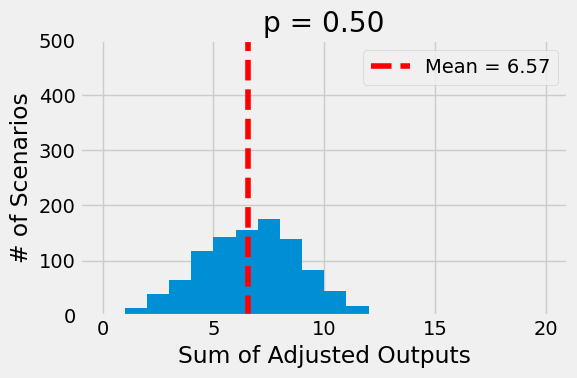

In [ ]:
fig = figure7(p, distrib_outputs)

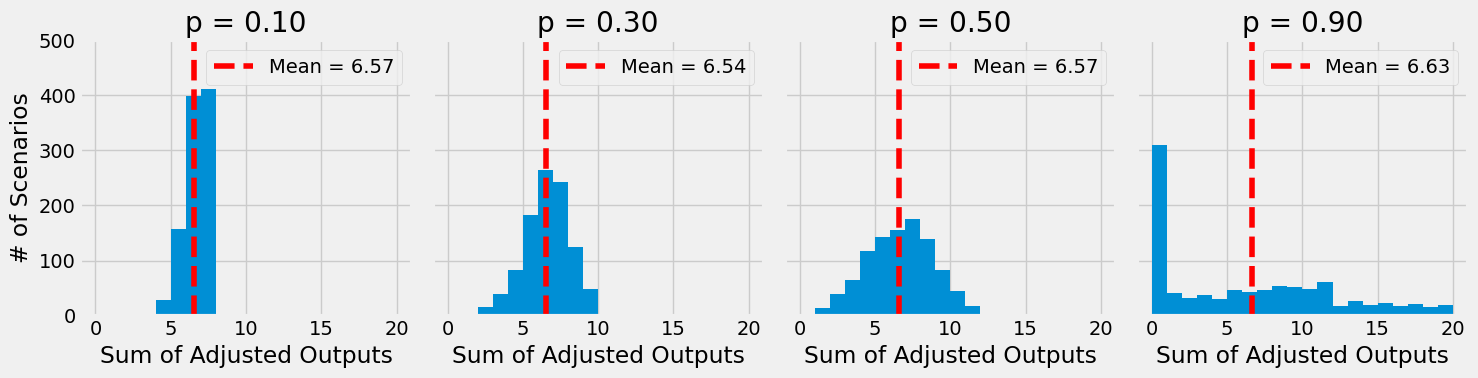

In [ ]:
fig = figure8()

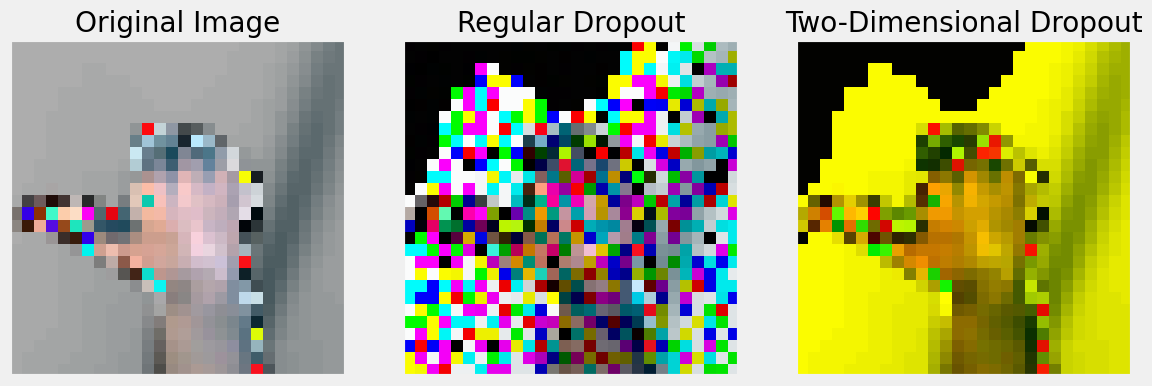

In [ ]:
fig = figure9(first_images)

### Model Configuration

In [ ]:
torch.manual_seed(13)
model_cnn2 = CNN2(n_feature=5, p=0.3)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer_cnn2 = optim.Adam(model_cnn2.parameters(), lr=3e-4)

### Model Training

In [ ]:
sbs_cnn2 = StepByStep(model_cnn2, multi_loss_fn, optimizer_cnn2)
sbs_cnn2.set_loaders(train_loader, val_loader)
sbs_cnn2.train(10)

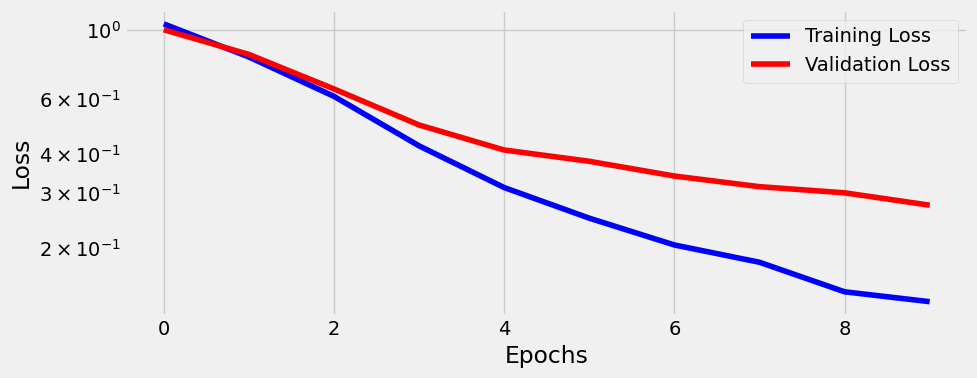

In [ ]:
fig = sbs_cnn2.plot_losses()

In [ ]:
StepByStep.loader_apply(val_loader, sbs_cnn2.correct)

tensor([[ 89, 124],
        [118, 124],
        [116, 124]])

### Regularising Effect

In [ ]:
torch.manual_seed(13)
# Model Configuration
model_cnn2_nodrop = CNN2(n_feature=5, p=0.0)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer_cnn2_nodrop = optim.Adam(model_cnn2_nodrop.parameters(), lr=3e-4)

# Model Training
sbs_cnn2_nodrop = StepByStep(model_cnn2_nodrop, multi_loss_fn, optimizer_cnn2_nodrop)
sbs_cnn2_nodrop.set_loaders(train_loader, val_loader)
sbs_cnn2_nodrop.train(10)

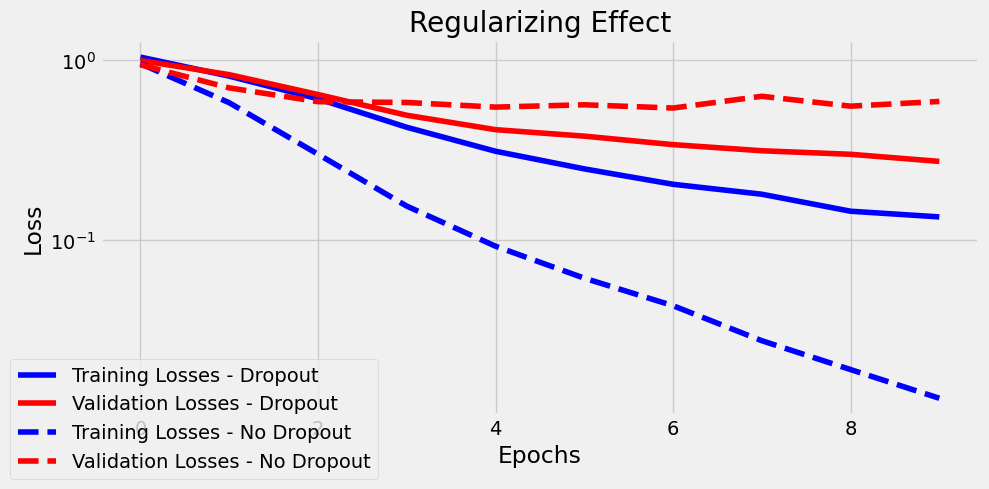

In [ ]:
fig = figure11(sbs_cnn2.losses,
               sbs_cnn2.val_losses,
               sbs_cnn2_nodrop.losses,
               sbs_cnn2_nodrop.val_losses)

In [ ]:
print(
    StepByStep.loader_apply(train_loader, sbs_cnn2_nodrop.correct).sum(axis=0),
    StepByStep.loader_apply(val_loader, sbs_cnn2_nodrop.correct).sum(axis=0)
)

tensor([2520, 2520]) tensor([292, 372])


In [ ]:
print(
    StepByStep.loader_apply(train_loader, sbs_cnn2.correct).sum(axis=0),
    StepByStep.loader_apply(val_loader, sbs_cnn2.correct).sum(axis=0)
)

tensor([2503, 2520]) tensor([323, 372])


In [ ]:
model_cnn2.conv1

Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
model_cnn2.conv1.weight

Parameter containing:
tensor([[[[-0.2292, -0.0585,  0.2535],
          [-0.2293, -0.2515,  0.1117],
          [-0.1010,  0.0896,  0.2195]],

         [[-0.1888, -0.2015,  0.1298],
          [ 0.1216, -0.0623,  0.1089],
          [-0.0775, -0.1361, -0.0085]],

         [[ 0.0558, -0.1836,  0.3354],
          [-0.0646, -0.0945,  0.2155],
          [ 0.1867, -0.1133,  0.0137]]],


        [[[ 0.1374, -0.0405, -0.2392],
          [-0.1130, -0.0468, -0.0356],
          [ 0.1772,  0.2333, -0.1301]],

         [[ 0.0326, -0.0960, -0.0492],
          [-0.0438,  0.2623, -0.2455],
          [ 0.1848,  0.0530,  0.0825]],

         [[ 0.1911,  0.1350, -0.2087],
          [-0.0392,  0.2117, -0.0308],
          [ 0.1090, -0.0154,  0.1293]]],


        [[[-0.0354, -0.0739, -0.2129],
          [-0.0333, -0.2119, -0.0349],
          [-0.2270, -0.0734, -0.0845]],

         [[-0.1842, -0.2779, -0.3159],
          [-0.1596, -0.0577,  0.0304],
          [ 0.0856, -0.0063, -0.2383]],

         [[-0.3226, -0

In [ ]:
model_cnn2.conv1.weight.shape

torch.Size([5, 3, 3, 3])

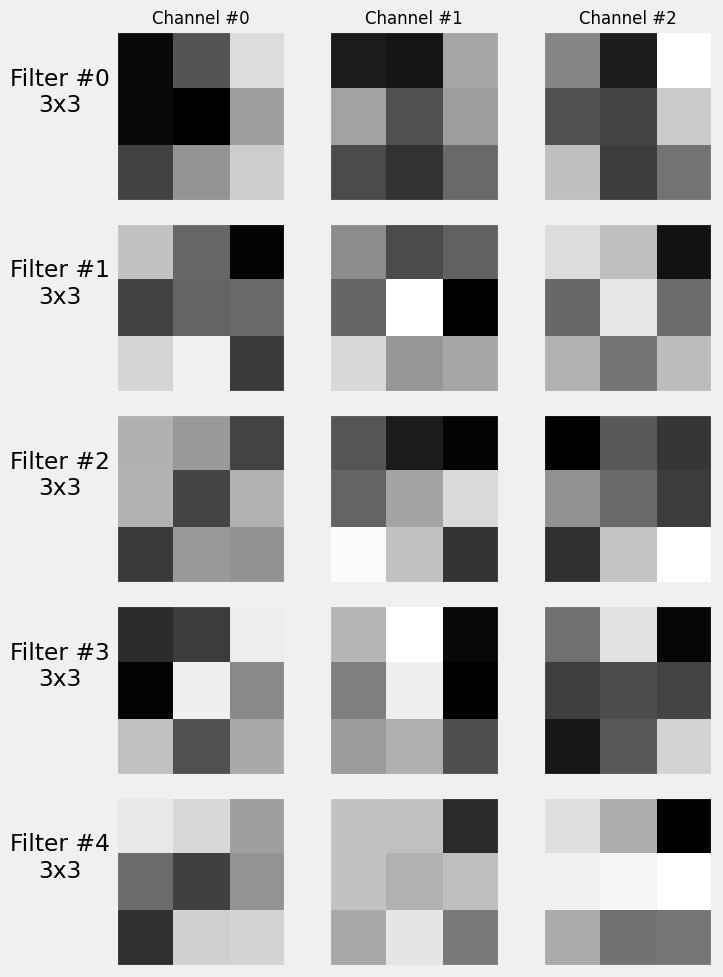

In [ ]:
fig = sbs_cnn2.visualize_filters('conv1')

In [ ]:
model_cnn2.conv2.weight.shape

torch.Size([5, 5, 3, 3])

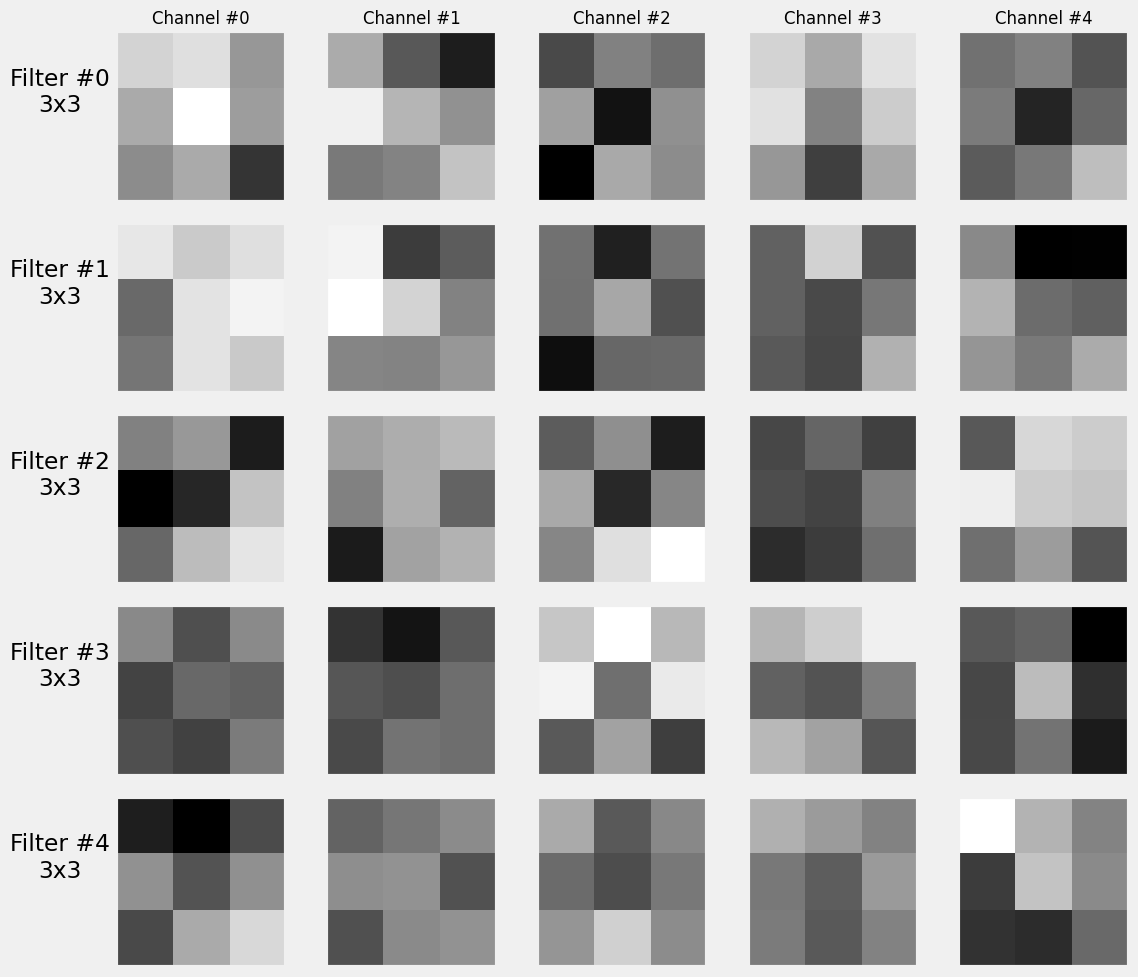

In [ ]:
fib = sbs_cnn2.visualize_filters('conv2')

In [ ]:
def make_lr_fn(start_lr, end_lr, num_iter, step_mode='exp'):
  if step_mode == 'linear':
    factor = (end_lr / start_lr - 1) / num_iter
    def lr_fn(iteration):
      return 1 + iteration * factor
  else:
    factor = (np.log(end_lr) - np.log(start_lr)) / num_iter
    def lr_fn(iteration):
      return np.exp(factor) ** iteration
  return lr_fn

In [ ]:
start_lr = 0.01
end_lr = 0.1
num_iter = 10
lr_fn = make_lr_fn(start_lr, end_lr, num_iter, step_mode='exp')

In [ ]:
lr_fn

<function __main__.make_lr_fn.<locals>.lr_fn(iteration)>

In [ ]:
lr_fn(np.arange(num_iter + 1))

array([ 1.        ,  1.25892541,  1.58489319,  1.99526231,  2.51188643,
        3.16227766,  3.98107171,  5.01187234,  6.30957344,  7.94328235,
       10.        ])

In [ ]:
lr_fn2 = make_lr_fn(start_lr, end_lr, num_iter, step_mode='linear')
lr_fn2(np.arange(num_iter + 1))

array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ])

In [ ]:
start_lr * lr_fn(np.arange(num_iter + 1))

array([0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
       0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
       0.1       ])

In [ ]:
dummy_model = CNN2(n_feature=5, p=0.3)
dummy_optimizer = optim.Adam(dummy_model.parameters(), lr=start_lr)
dummy_scheduler = LambdaLR(dummy_optimizer, lr_lambda=lr_fn)

In [ ]:
dummy_optimizer.step()
dummy_scheduler.step()

In [ ]:
dummy_scheduler.get_last_lr()[0]

0.012589254117941673

In [ ]:
def lr_range_test(self, data_loader, end_lr, num_iter=100, step_mode='exp', alpha=0.05, ax=None):
  # Since the test updates both model and optimizer we need to store
  # their initial states to restore them in the end
  previous_states = {'model': deepcopy(self.model.state_dict()),
                    'optimizer': deepcopy(self.optimizer.state_dict())}

  # Retrieves the learning rate set in the optimizer
  start_lr = self.optimizer.state_dict()['param_groups'][0]['lr']

  # Builds a custom function and corresponding scheduler
  lr_fn = make_lr_fn(start_lr, end_lr, num_iter)
  scheduler = LambdaLR(self.optimizer, lr_lambda=lr_fn)

  # Variables for tracking results and iterations
  tracking = {'loss': [], 'lr': []}
  iteration = 0

  # If there are more iterations than mini-batches in the data loader,
  # it will have to loop over it more than once
  while iteration < num_iter:
    # That's the typical mini-batch inner loop
    for x_batch, y_batch in data_loader:
      x_batch = x_batch.to(self.device)
      y_batch = y_batch.to(self.device)
      # Step 1
      yhat = self.model(x_batch)
      # Step 2
      loss = self.loss_fn(yhat, y_batch)
      # Step 3
      loss.backward()

      # Here we keep track of the losses (smoothed)
      # and the learning rates
      tracking['lr'].append(scheduler.get_last_lr()[0])
      if iteration == 0:
        tracking['loss'].append(loss.item())
      else:
        prev_loss = tracking['loss'][-1]
        smoothed_loss = alpha * loss.item() + (1 - alpha) * prev_loss
        tracking['loss'].append(smoothed_loss)

      iteration += 1
      # Number of iterations reached
      if iteration == num_iter:
        break

      # Step 4
      self.optimizer.step()
      scheduler.step()
      self.optimizer.zero_grad()


  # Restores the original states
  self.optimizer.load_state_dict(previous_states['optimizer'])
  self.model.load_state_dict(previous_states['model'])

  if ax is None:
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
  else:
    fig = ax.get_figure()

  ax.plot(tracking['lr'], tracking['loss'])

  if step_mode == 'exp':
    ax.set_xscale('log')

  ax.set_xlabel('Learning Rate')
  ax.set_ylabel('Loss')

  fig.tight_layout()

  return tracking, fig

setattr(StepByStep, 'lr_range_test', lr_range_test)

In [ ]:
torch.manual_seed(13)
new_model = CNN2(n_feature=5, p=0.3)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
new_optimizer = optim.Adam(new_model.parameters(), lr=3e-4)

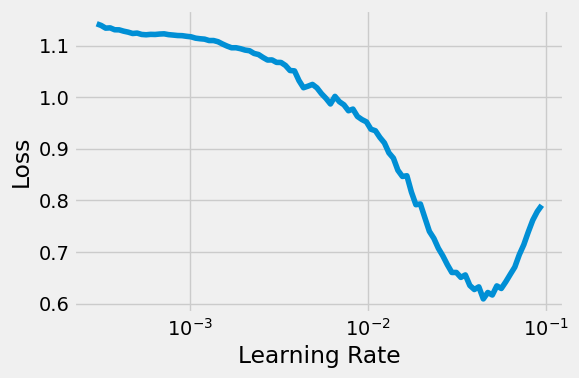

In [ ]:
sbs_new = StepByStep(new_model, multi_loss_fn, new_optimizer)
tracking, fig = sbs_new.lr_range_test(train_loader, end_lr=1e-1, num_iter=100)

In [ ]:
def set_optimizer(self, optimizer):
  self.optimizer = optimizer

setattr(StepByStep, 'set_optimizer', set_optimizer)

In [ ]:
new_optimizer = optim.Adam(new_model.parameters(), lr=0.005)
sbs_new.set_optimizer(new_optimizer)
sbs_new.set_loaders(train_loader, val_loader)
sbs_new.train(10)

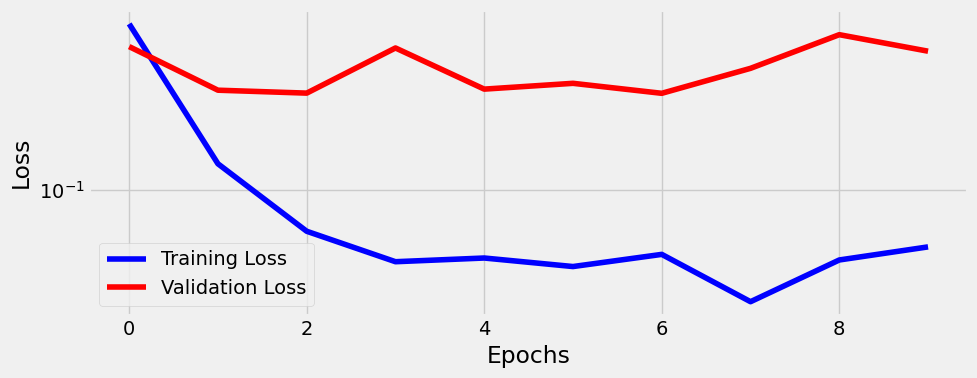

In [ ]:
# This plot wasn't included int he book
fig = sbs_new.plot_losses()

In [ ]:
!pip install torch-lr-finder --quiet

In [ ]:
from torch_lr_finder import LRFinder
from tqdm.autonotebook import tqdm

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.02E-03


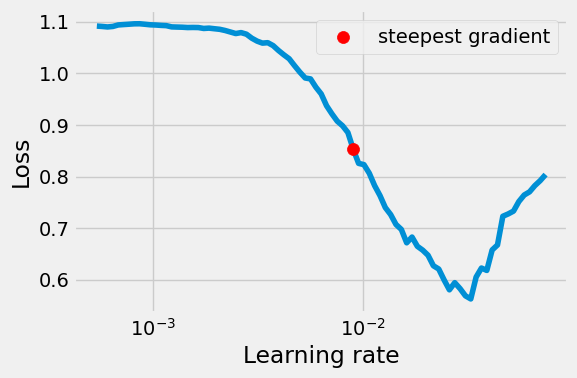

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

torch.manual_seed(11)
new_model = CNN2(n_feature=5, p=0.3)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
new_optimizer = optim.Adam(new_model.parameters(), lr=3e-4)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

lr_finder = LRFinder(new_model, new_optimizer, multi_loss_fn, device=device)
lr_finder.range_test(train_loader, end_lr=1e-1, num_iter=100)
lr_finder.plot(ax=ax, log_lr=True)

fig.tight_layout()
lr_finder.reset()

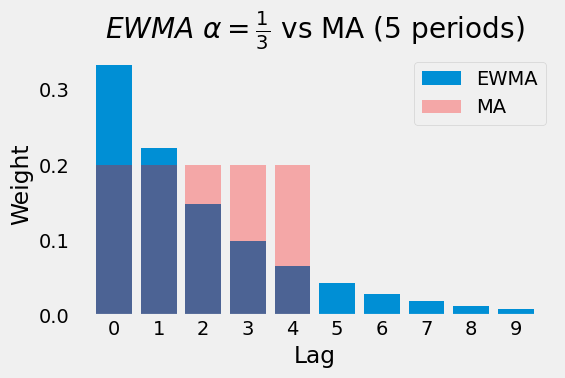

In [ ]:
fig = figure15()

In [ ]:
alpha = 1/3;
T = 93
t = np.arange(1, T+1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93])

In [ ]:
age = alpha * sum((1 - alpha)**(t - 1) * t)
age

3.0

In [ ]:
alpha * (1 - alpha)**(t - 1) * t

array([3.33333333e-01, 4.44444444e-01, 4.44444444e-01, 3.95061728e-01,
       3.29218107e-01, 2.63374486e-01, 2.04846822e-01, 1.56073769e-01,
       1.17055327e-01, 8.67076496e-02, 6.35856097e-02, 4.62440798e-02,
       3.33985021e-02, 2.39784117e-02, 1.71274370e-02, 1.21795107e-02,
       8.62715343e-03, 6.08975536e-03, 4.28538340e-03, 3.00728660e-03,
       2.10510062e-03, 1.47022900e-03, 1.02470506e-03, 7.12838305e-04,
       4.95026601e-04, 3.43218443e-04, 2.37612768e-04, 1.64275494e-04,
       1.13428317e-04, 7.82264258e-05, 5.38893155e-05, 3.70851204e-05,
       2.54960202e-05, 1.75124179e-05, 1.20183260e-05, 8.24113786e-06,
       5.64670557e-06, 3.86621282e-06, 2.64530351e-06, 1.80875454e-06,
       1.23598227e-06, 8.44085450e-07, 5.76121815e-07, 3.93013331e-07,
       2.67963635e-07, 1.82612255e-07, 1.24388058e-07, 8.46897415e-08,
       5.76360740e-08, 3.92082136e-08, 2.66615853e-08, 1.81229076e-08,
       1.23142834e-08, 8.36441891e-09, 5.67954370e-09, 3.85520542e-09,
      

In [ ]:
sum(alpha * (1 - alpha)**(t - 1) * t)

2.9999999999999987

In [ ]:
def EWMA(past_value, current_value, alpha):
  return (1 - alpha) * past_value + alpha * current_value

In [ ]:
def calc_ewma(values, period):
  alpha = 2 / (period + 1)
  result = []
  for v in values:
    try:
      prev_value = result[-1]
    except IndexError:
      prev_value = 0

    new_value = EWMA(prev_value, v, alpha)
    result.append(new_value)
  return np.array(result)

In [ ]:
def correction(averaged_value, beta, steps):
  return averaged_value / (1 - (beta ** steps))

In [ ]:
def calc_corrected_ewma(values, period):
  ewma = calc_ewma(values, period)

  alpha = 2 / (period + 1)
  beta = 1 - alpha

  result = []

  for step, v in enumerate(ewma):
    adj_value = correction(v, beta, step + 1)
    result.append(adj_value)

  return np.array(result)

In [ ]:
temperatures = np.array([5, 11, 15, 6, 5, 3, 3, 0, 0, 3, 4, 2, 1,
    -1, -2, 2, 2, -2, -1, -1, 3, 4, -1, 2, 6, 4, 9, 11, 9, -2])

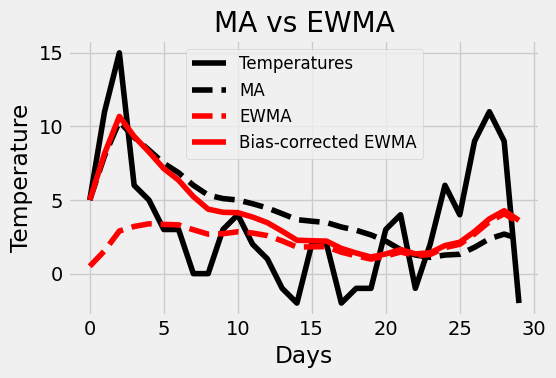

In [ ]:
fig = ma_vs_ewma(temperatures, periods=19)

In [ ]:
optimizer = optim.Adam(model_cnn2.parameters(), lr=0.0125, betas=(0.9, 0.999), eps=1e-8)

In [ ]:
%run -i data_generation/simple_linear_regression.py

<Figure size 640x480 with 0 Axes>

In [ ]:
%run -i data_preparation/v2.py

In [ ]:
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(1, 1))
optimizer = optim.Adam(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss(reduction='mean')

In [ ]:
setattr(StepByStep, '_gradients', {})

def capture_gradients(self, layers_to_hook):
    if not isinstance(layers_to_hook, list):
        layers_to_hook = [layers_to_hook]

    modules = list(self.model.named_modules())
    self._gradients = {}

    def make_log_fn(name, parm_id):
        def log_fn(grad):
            self._gradients[name][parm_id].append(grad.tolist())
            return
        return log_fn

    for name, layer in self.model.named_modules():
        if name in layers_to_hook:
            self._gradients.update({name: {}})
            for parm_id, p in layer.named_parameters():
                if p.requires_grad:
                    self._gradients[name].update({parm_id: []})
                    log_fn = make_log_fn(name, parm_id)
                    self.handles[f'{name}.{parm_id}.grad'] = p.register_hook(log_fn)
    return

setattr(StepByStep, 'capture_gradients', capture_gradients)

In [ ]:
sbs_adam = StepByStep(model, loss_fn, optimizer)
sbs_adam.set_loaders(train_loader, val_loader)
sbs_adam.capture_gradients('linear')
sbs_adam.train(10)
sbs_adam.remove_hooks()

In [ ]:
gradients = np.array(sbs_adam._gradients['linear']['weight']).squeeze()
corrected_gradients = calc_corrected_ewma(gradients, 19)
corrected_sq_gradients = calc_corrected_ewma(np.power(gradients, 2), 1999)
adapted_gradients = corrected_gradients / (np.sqrt(corrected_sq_gradients) + 1e-8)

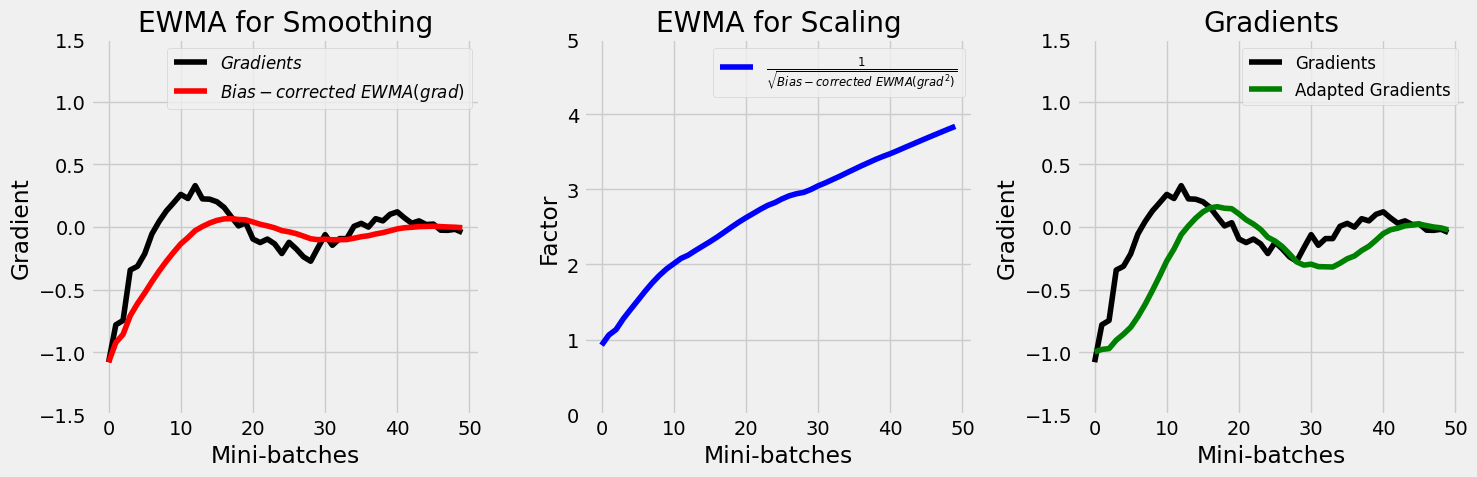

In [ ]:
fig = figure17(gradients, corrected_gradients, corrected_sq_gradients, adapted_gradients)

In [ ]:
optimizer.state_dict()

{'state': {0: {'step': tensor(50.),
   'exp_avg': tensor([[-0.0062]]),
   'exp_avg_sq': tensor([[0.0033]])},
  1: {'step': tensor(50.),
   'exp_avg': tensor([0.0405]),
   'exp_avg_sq': tensor([0.0097])}},
 'param_groups': [{'lr': 0.1,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'maximize': False,
   'foreach': None,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [ ]:
calc_ewma(gradients, 19)[-1]

-0.006161476466002255

In [ ]:
calc_ewma(np.power(gradients, 2), 1999)[-1]

0.003308466907084168

In [ ]:
setattr(StepByStep, '_parameters', {})

def capture_parameters(self, layers_to_hook):
    if not isinstance(layers_to_hook, list):
        layers_to_hook = [layers_to_hook]

    modules = list(self.model.named_modules())
    layer_names = {layer: name for name, layer in modules}

    self._parameters = {}

    for name, layer in modules:
        if name in layers_to_hook:
            self._parameters.update({name: {}})
            for parm_id, p in layer.named_parameters():
                self._parameters[name].update({parm_id: []})

    def fw_hook_fn(layer, inputs, outputs):
        name = layer_names[layer]
        for parm_id, parameter in layer.named_parameters():
            self._parameters[name][parm_id].append(parameter.tolist())

    self.attach_hooks(layers_to_hook, fw_hook_fn)
    return

setattr(StepByStep, 'capture_parameters', capture_parameters)

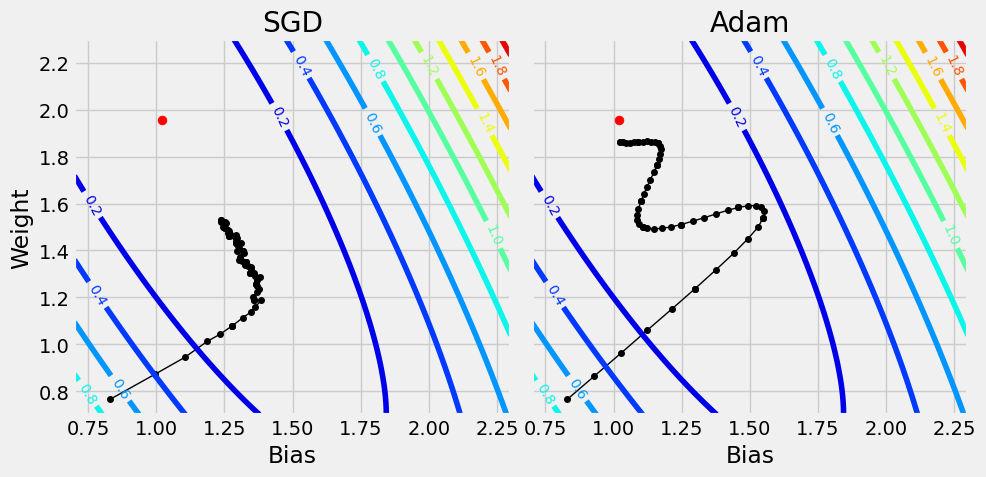

In [ ]:
# Generating data for the plots
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(1, 1))
loss_fn = nn.MSELoss(reduction='mean')

optimizers = {'SGD': {'class': optim.SGD, 'parms': {'lr': 0.1}},
             'Adam': {'class': optim.Adam, 'parms': {'lr': 0.1}}}
results = compare_optimizers(model, loss_fn, optimizers, train_loader, val_loader, n_epochs=10)

b, w, bs, ws, all_losses = contour_data(x_tensor, y_tensor)
fig = plot_paths(results, b, w, bs, ws, all_losses)

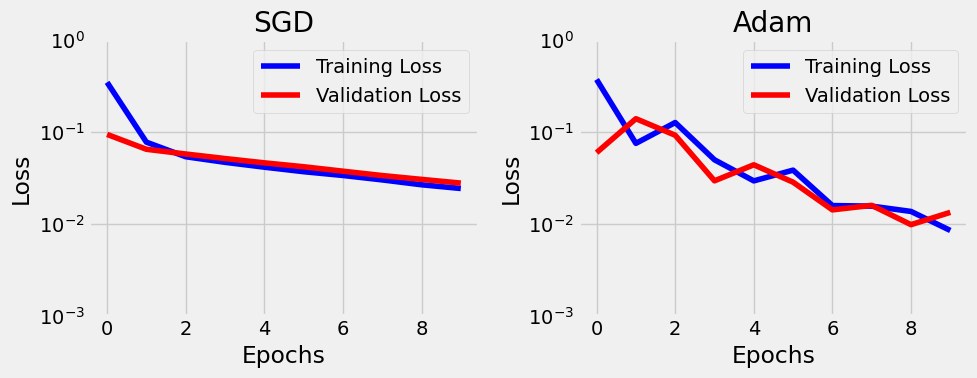

In [ ]:
fig = plot_losses(results)

In [ ]:
# Generating data for the plots
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(1, 1))
loss_fn = nn.MSELoss(reduction='mean')

optimizers = {'SGD': {'class': optim.SGD, 'parms': {'lr': 0.1}},
             'SGD + Momentum': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9}}}

results = compare_optimizers(model, loss_fn, optimizers, train_loader, val_loader, n_epochs=10)

In [ ]:
results

{'SGD': {'parms': {'': {'linear.weight': [[[0.7645385265350342]],
     [[0.8726816177368164]],
     [[0.9436930418014526]],
     [[1.012261152267456]],
     [[1.043689250946045]],
     [[1.0791568756103516]],
     [[1.0791568756103516]],
     [[1.0791568756103516]],
     [[1.112377405166626]],
     [[1.1382241249084473]],
     [[1.1579596996307373]],
     [[1.1864488124847412]],
     [[1.1890678405761719]],
     [[1.1890678405761719]],
     [[1.1890678405761719]],
     [[1.2006161212921143]],
     [[1.2227544784545898]],
     [[1.2374628782272339]],
     [[1.24630606174469]],
     [[1.257023811340332]],
     [[1.257023811340332]],
     [[1.257023811340332]],
     [[1.2717609405517578]],
     [[1.2859925031661987]],
     [[1.2900359630584717]],
     [[1.3027085065841675]],
     [[1.3049031496047974]],
     [[1.3049031496047974]],
     [[1.3049031496047974]],
     [[1.3194935321807861]],
     [[1.3300113677978516]],
     [[1.333417296409607]],
     [[1.3390387296676636]],
     [[1.350856

In [ ]:
results['SGD + Momentum']['state']

{'state': {0: {'momentum_buffer': tensor([[-0.0308]])},
  1: {'momentum_buffer': tensor([-0.1423])}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

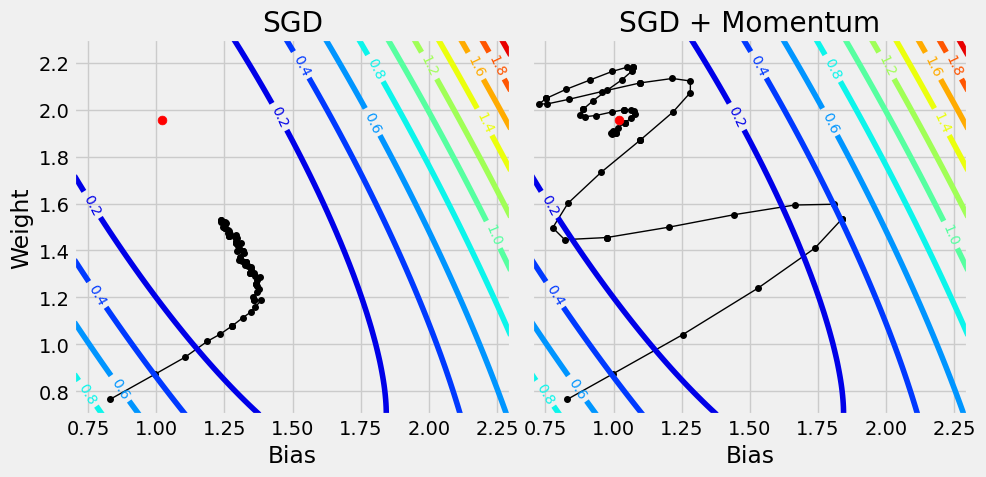

In [ ]:
fig = plot_paths(results, b, w, bs, ws, all_losses)

In [ ]:
# Generating data for the plots
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(1, 1))
loss_fn = nn.MSELoss(reduction='mean')

optimizers = {'SGD': {'class': optim.SGD, 'parms': {'lr': 0.1}},
              'SGD + Momentum': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9}},
              'SGD + Nesterov': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9, 'nesterov': True}}}

results = compare_optimizers(model, loss_fn, optimizers, train_loader, val_loader, n_epochs=10)

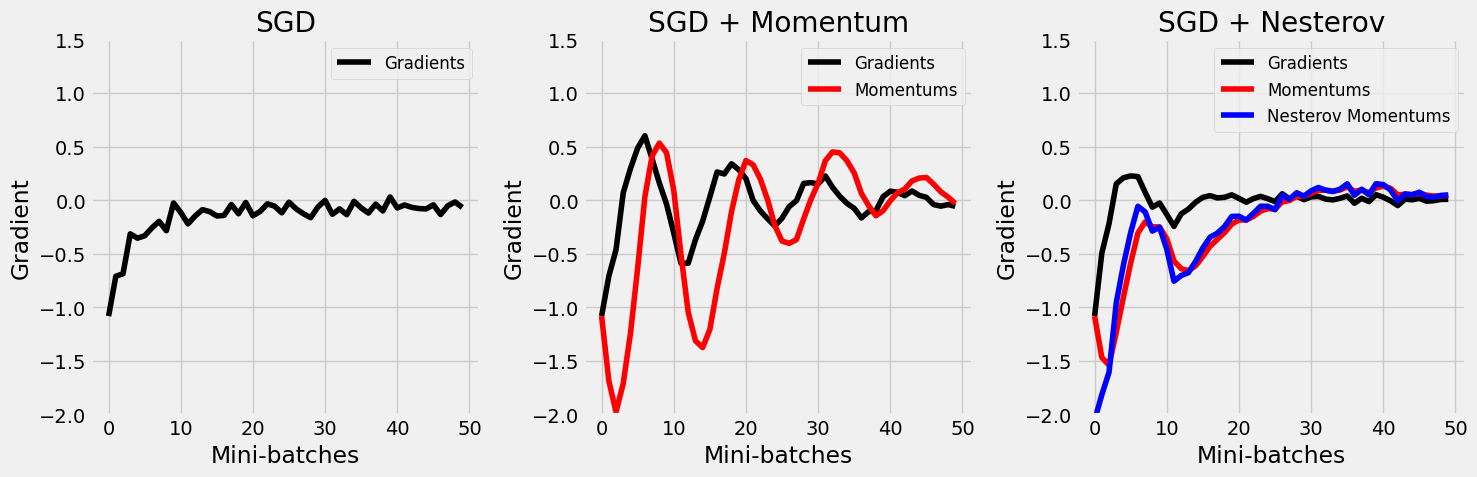

In [ ]:
fig = figure21(results)

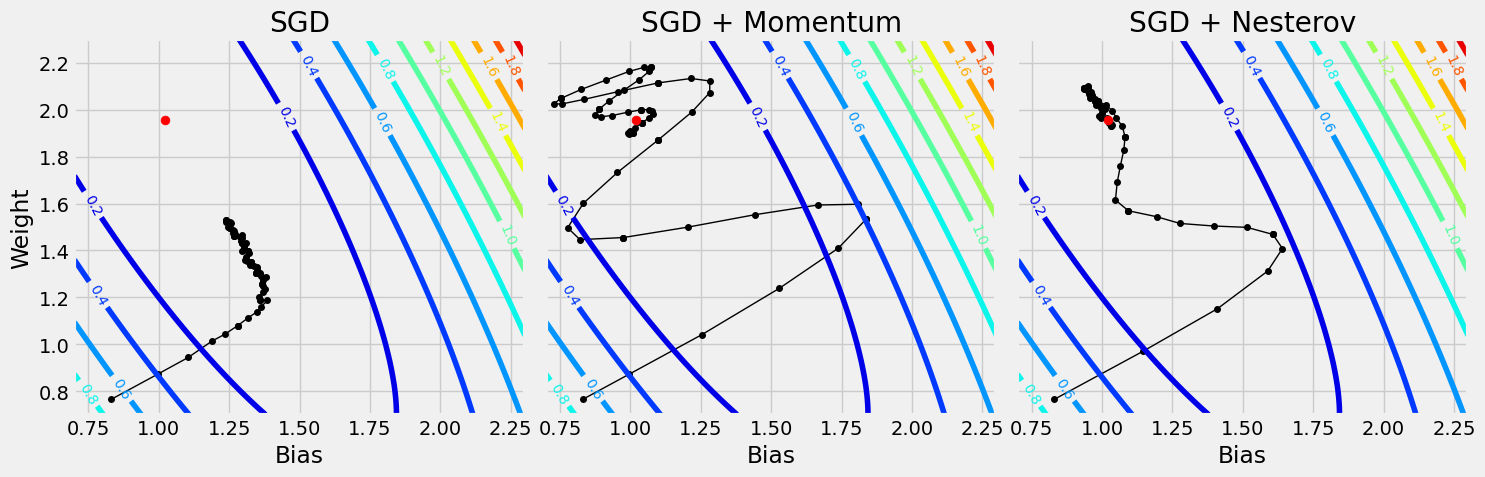

In [ ]:
fig = plot_paths(results, b, w, bs, ws, all_losses)

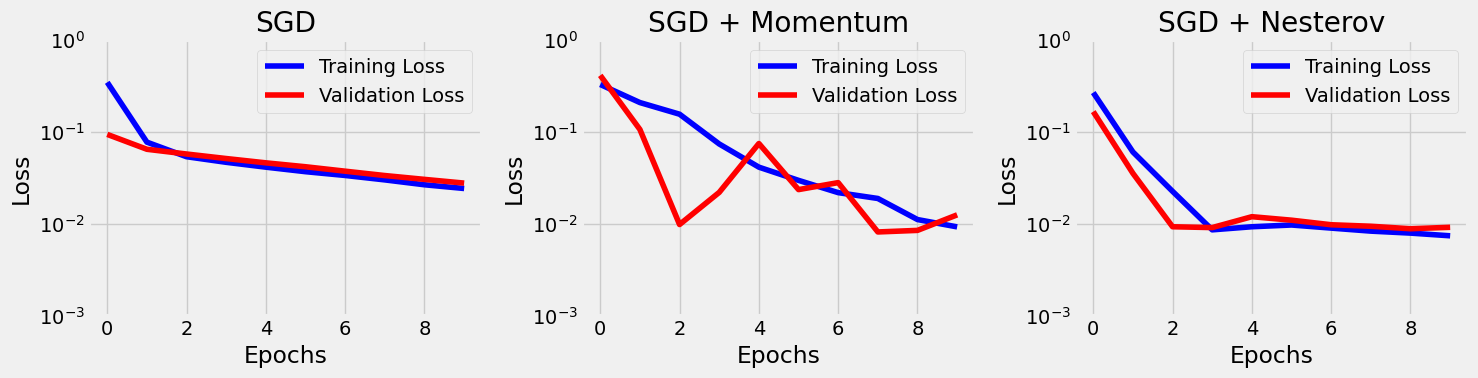

In [ ]:
fig = plot_losses(results)

In [ ]:
dummy_optimizer = optim.SGD([nn.Parameter(torch.randn(1))], lr=0.01)
dummy_scheduler = StepLR(dummy_optimizer, step_size=2, gamma=0.1)

In [ ]:
for epoch in range(4):
  # Training loop code goes here

  print(dummy_scheduler.get_last_lr())
  # First call optimizer's step
  dummy_optimizer.step()

  # Then call scheduler's step
  dummy_scheduler.step()

  dummy_optimizer.zero_grad()

[0.01]
[0.01]
[0.001]
[0.001]


In [ ]:
dummy_optimizer = optim.SGD([nn.Parameter(torch.randn(1))], lr=0.01)
dummy_scheduler = LambdaLR(dummy_optimizer, lr_lambda=lambda epoch: 0.1 ** (epoch//2))
# The scheduler above is equivalent to this one
# dummy_scheduler = StepLR(dummy_optimizer, step_size=2, gamma=0.1)

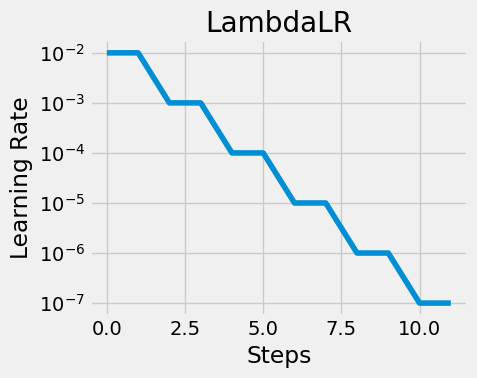

In [ ]:
fig = plot_scheduler(dummy_optimizer, dummy_scheduler)

In [ ]:
dummy_optimizer = optim.SGD([nn.Parameter(torch.randn(1))], lr=0.01)
#dummy_scheduler = LambdaLR(dummy_optimizer, lr_lambda=lambda epoch: 0.1 ** (epoch//2))
# The scheduler above is equivalent to this one
dummy_scheduler = StepLR(dummy_optimizer, step_size=2, gamma=0.1)

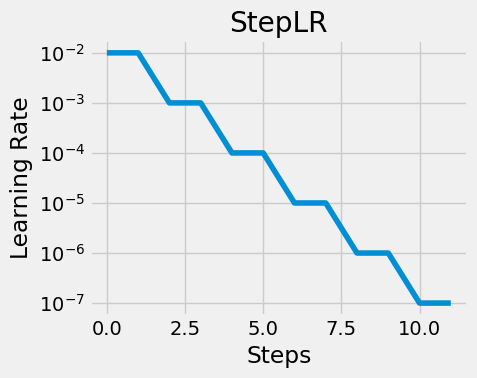

In [ ]:
fig = plot_scheduler(dummy_optimizer, dummy_scheduler)

In [ ]:
dummy_optimizer = optim.SGD([nn.Parameter(torch.randn(1))], lr=0.01)
dummy_scheduler = ReduceLROnPlateau(dummy_optimizer, patience=4, factor=0.1)

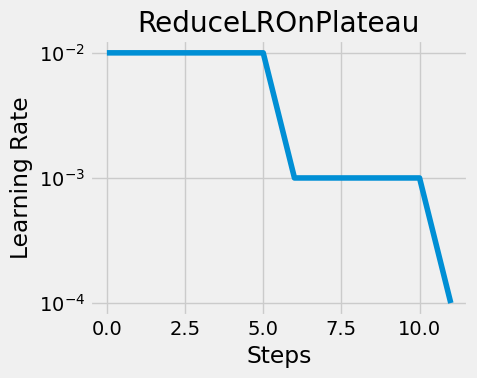

In [ ]:
fig = plot_scheduler(dummy_optimizer, dummy_scheduler)

In [ ]:
setattr(StepByStep, 'scheduler', None)
setattr(StepByStep, 'is_batch_lr_scheduler', False)

def set_lr_scheduler(self, scheduler):
    # Makes sure the scheduler in the argument is assigned to the
    # optimizer we're using in this class
    if scheduler.optimizer == self.optimizer:
        self.scheduler = scheduler
        if (isinstance(scheduler, optim.lr_scheduler.CyclicLR) or
            isinstance(scheduler, optim.lr_scheduler.OneCycleLR) or
            isinstance(scheduler, optim.lr_scheduler.CosineAnnealingWarmRestarts)):
            self.is_batch_lr_scheduler = True
        else:
            self.is_batch_lr_scheduler = False

setattr(StepByStep, 'set_lr_scheduler', set_lr_scheduler)

In [ ]:
setattr(StepByStep, 'learning_rates', [])

def _epoch_schedulers(self, val_loss):
    if self.scheduler:
        if not self.is_batch_lr_scheduler:
            if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                self.scheduler.step(val_loss)
            else:
                self.scheduler.step()

            current_lr = list(map(lambda d: d['lr'], self.scheduler.optimizer.state_dict()['param_groups']))
            self.learning_rates.append(current_lr)

setattr(StepByStep, '_epoch_schedulers', _epoch_schedulers)

In [ ]:
def train(self, n_epochs, seed=42):
  # To ensure reproducibilibity of the training process
  self.set_seed(seed)

  for epoch in range(n_epochs):
    # Keeps track of the numbers of epochs
    # by updating the corresponding attribute
    self.total_epochs += 1

    # inner loop
    # Performs training using mini-batches
    loss = self._mini_batch(validation=False)
    self.losses.append(loss)

    # Validation
    # no gradients in validation
    with torch.no_grad():
      # Performs evaluation using mini-batches
      val_loss = self._mini_batch(validation=True)
      self.val_losses.append(val_loss)

    self._epoch_schedulers(val_loss)

    # If a SummaryWriter has been set...
    if self.writer:
      scalars = {'training': loss}
      if val_loss is not None:
        scalars.update({'validation': val_loss})
      # Records both losses for each epoch under the main tag 'loss'
      self.writer.add_scalars(main_tag='loss',
                              tag_scalar_dict=scalars,
                              global_step=epoch)

  if self.writer:
    # Closes the writer
    self.writer.close()

setattr(StepByStep, 'train', train)

In [ ]:
dummy_parm = [nn.Parameter(torch.randn(1))]
dummy_optimizer = optim.SGD(dummy_parm, lr=0.01)

dummy_scheduler1 = CyclicLR(dummy_optimizer, base_lr=1e-4, max_lr=1e-3, step_size_up=2, mode='triangular')
dummy_scheduler2 = CyclicLR(dummy_optimizer, base_lr=1e-4, max_lr=1e-3, step_size_up=2, mode='triangular2')
dummy_scheduler3 = CyclicLR(dummy_optimizer, base_lr=1e-4, max_lr=1e-3, step_size_up=2, mode='exp_range', gamma=np.sqrt(.5))

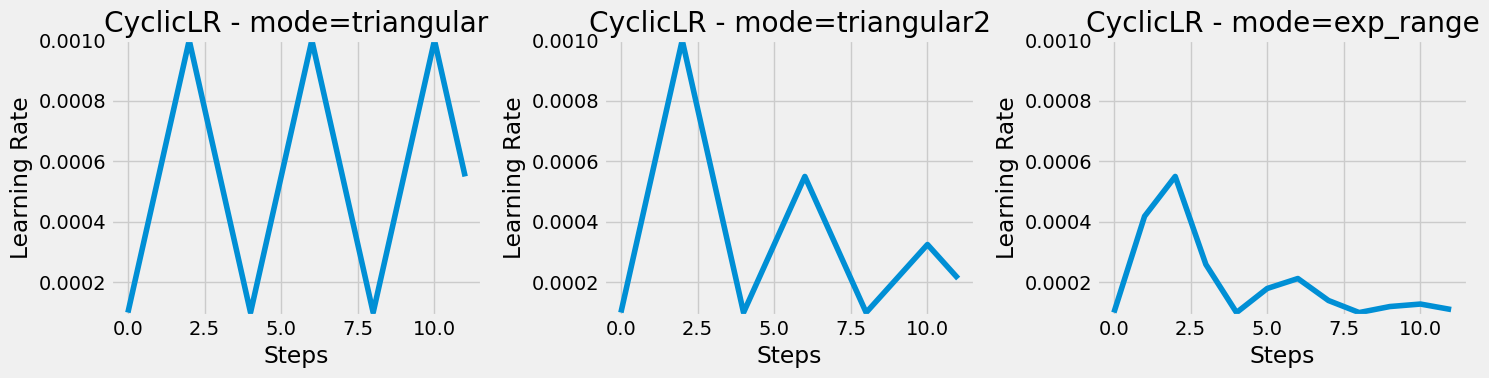

In [ ]:
fig = figure26(dummy_optimizer, (dummy_scheduler1, dummy_scheduler2, dummy_scheduler3))

In [ ]:
def _mini_batch_schedulers(self, frac_epoch):
    if self.scheduler:
        if self.is_batch_lr_scheduler:
            if isinstance(self.scheduler, torch.optim.lr_scheduler.CosineAnnealingWarmRestarts):
                self.scheduler.step(self.total_epochs + frac_epoch)
            else:
                self.scheduler.step()

            current_lr = list(map(lambda d: d['lr'], self.scheduler.optimizer.state_dict()['param_groups']))
            self.learning_rates.append(current_lr)

setattr(StepByStep, '_mini_batch_schedulers', _mini_batch_schedulers)

In [ ]:
def _mini_batch(self, validation=False):
    # The mini-batch can be used with both loaders
    # The argument `validation`defines which loader and
    # corresponding step function is going to be used
    if validation:
        data_loader = self.val_loader
        step_fn = self.val_step_fn
    else:
        data_loader = self.train_loader
        step_fn = self.train_step_fn

    if data_loader is None:
        return None

    n_batches = len(data_loader)
    # Once the data loader and step function, this is the same
    # mini-batch loop we had before
    mini_batch_losses = []
    for i, (x_batch, y_batch) in enumerate(data_loader):
        x_batch = x_batch.to(self.device)
        y_batch = y_batch.to(self.device)

        mini_batch_loss = step_fn(x_batch, y_batch)
        mini_batch_losses.append(mini_batch_loss)

        if not validation:
            self._mini_batch_schedulers(i / n_batches)

    loss = np.mean(mini_batch_losses)
    return loss

setattr(StepByStep, '_mini_batch', _mini_batch)

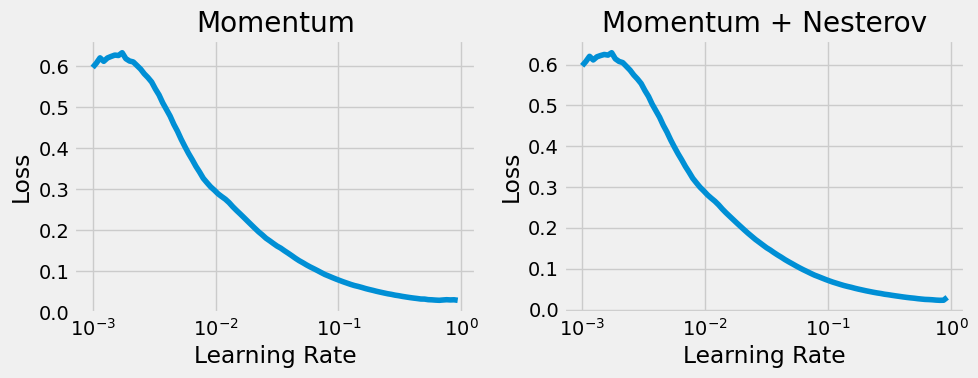

In [ ]:
from stepbystep.v3 import StepByStep

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for ax, nesterov in zip(axs.flat, [False, True]):
    torch.manual_seed(42)
    model = nn.Sequential()
    model.add_module('linear', nn.Linear(1, 1))
    loss_fn = nn.MSELoss(reduction='mean')
    optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=nesterov)

    sbs_scheduler = StepByStep(model, loss_fn, optimizer)
    tracking, fig = sbs_scheduler.lr_range_test(train_loader, end_lr=1, num_iter=100, ax=ax)

    nest = ' + Nesterov' if nesterov else ''
    ax.set_title(f'Momentum{nest}')

In [ ]:
step_scheduler = StepLR(optimizer, step_size=20, gamma=0.5)
cyclic_scheduler = CyclicLR(optimizer, base_lr=0.025, max_lr=0.1, step_size_up=10, mode='triangular2')

In [ ]:
# Generating data for the plots
torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(1, 1))
loss_fn = nn.MSELoss(reduction='mean')

optimizers = {'SGD + Momentum': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9}},
              'SGD + Momentum + Step': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9}},
              'SGD + Momentum + Cycle': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9}},
              'SGD + Nesterov': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9, 'nesterov': True}},
              'SGD + Nesterov + Step': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9, 'nesterov': True}},
              'SGD + Nesterov + Cycle': {'class': optim.SGD, 'parms': {'lr': 0.1, 'momentum': 0.9, 'nesterov': True}}}

schedulers = {'SGD + Momentum + Step': {'class': StepLR, 'parms': {'step_size': 4, 'gamma': 0.5}},
              'SGD + Momentum + Cycle': {'class': CyclicLR, 'parms': {'base_lr': 0.025, 'max_lr': 0.1, 'step_size_up': 10, 'mode': 'triangular2'}},
              'SGD + Nesterov + Step': {'class': StepLR, 'parms': {'step_size': 4, 'gamma': 0.5}},
              'SGD + Nesterov + Cycle': {'class': CyclicLR, 'parms': {'base_lr': 0.025, 'max_lr': 0.1, 'step_size_up': 10, 'mode': 'triangular2'}}}

results = compare_optimizers(model, loss_fn, optimizers, train_loader, val_loader, schedulers, n_epochs=10)

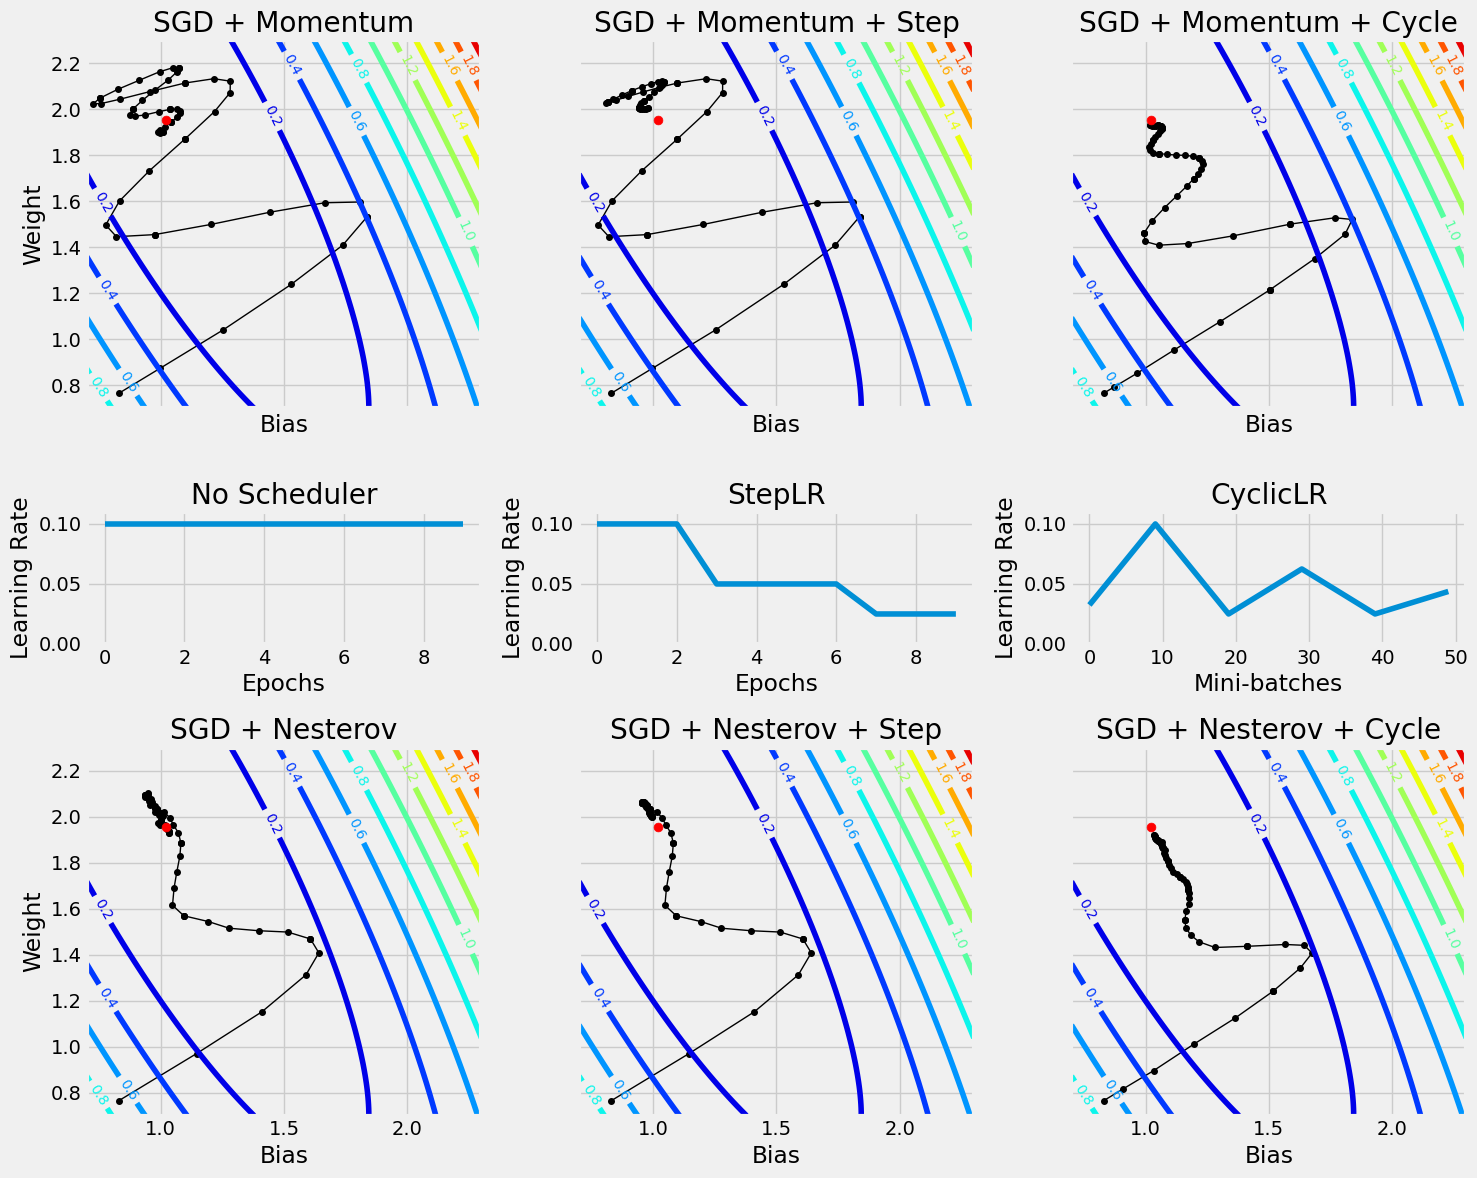

In [ ]:
fig = figure28(results, b, w, bs, ws, all_losses)

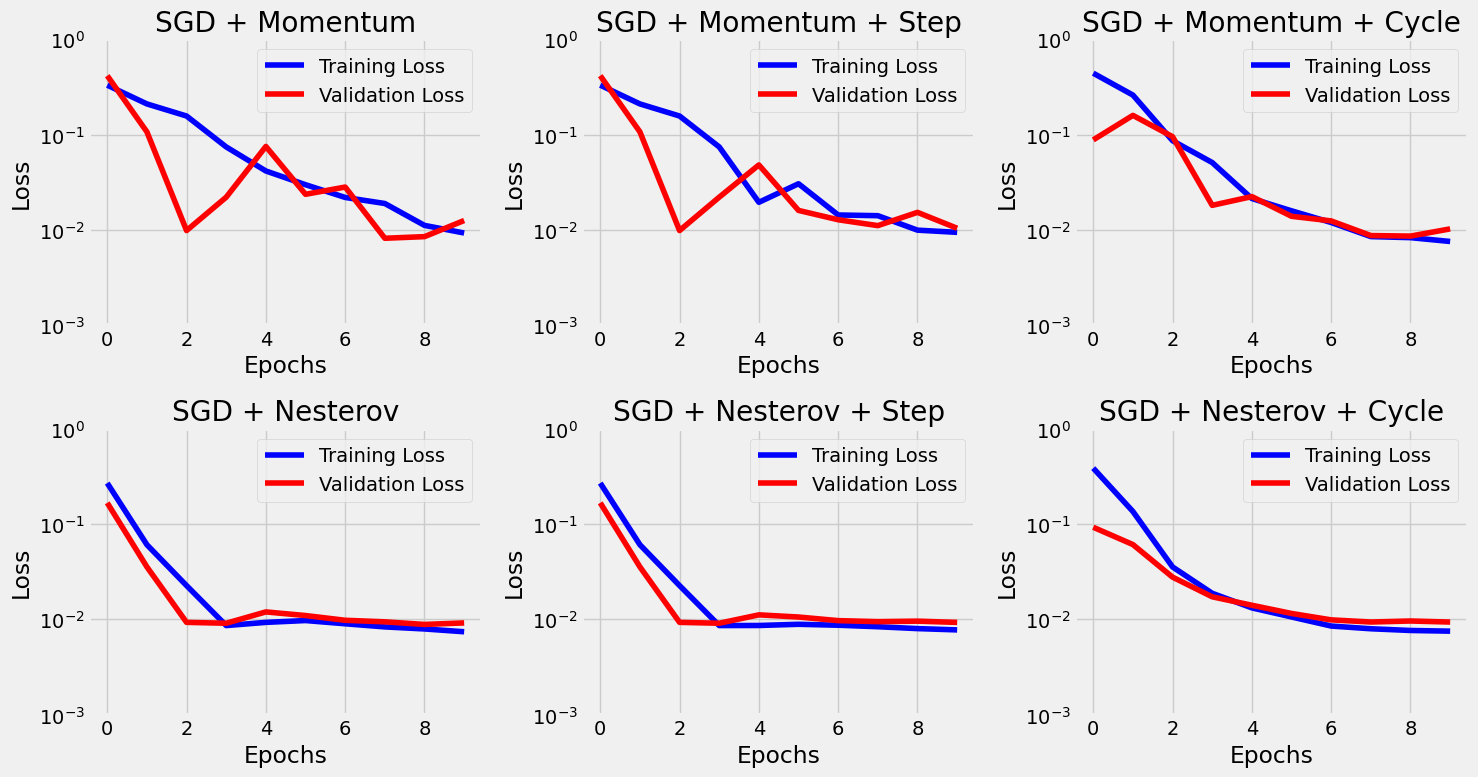

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flat
fig = plot_losses(results, axs)

In [ ]:
# Loads temporary dataset to build normalizer
temp_transform = Compose([
    Resize(28),
    ToImage(),
    ToDtype(torch.float32, scale=True)
])

temp_dataset = ImageFolder(root='rps', transform=temp_transform)

temp_loader = DataLoader(temp_dataset, batch_size=16)

normalizer = StepByStep.make_normalizer(temp_loader)

# Builds transformation, datasets and data loaders
composer = Compose([
    Resize(28),
    ToImage(),
    ToDtype(torch.float32, scale=True),
    normalizer
])

train_data = ImageFolder(root='rps', transform=composer)
val_data = ImageFolder(root='rps-test-set', transform=composer)

# Builds a loader of each set
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16)

In [ ]:
torch.manual_seed(13)
model_cnn3 = CNN2(n_feature=5, p=0.5)
multi_loss_fn = nn.CrossEntropyLoss(reduction='mean')
optimizer_cnn3 = optim.SGD(model_cnn3.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

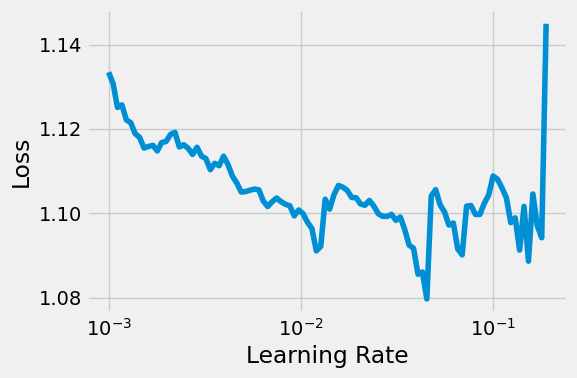

In [ ]:
sbs_cnn3 = StepByStep(model_cnn3, multi_loss_fn, optimizer_cnn3)
tracking, fig = sbs_cnn3.lr_range_test(train_loader, end_lr=2e-1, num_iter=100)

In [ ]:
optimizer_cnn3 = optim.SGD(model_cnn3.parameters(), lr=0.01, momentum=0.9, nesterov=True)
sbs_cnn3.set_optimizer(optimizer_cnn3)

scheduler = CyclicLR(optimizer_cnn3, base_lr=1e-3, max_lr=0.01, step_size_up=len(train_loader), mode='triangular2')
sbs_cnn3.set_lr_scheduler(scheduler)

In [ ]:
sbs_cnn3.set_loaders(train_loader, val_loader)
sbs_cnn3.train(10)

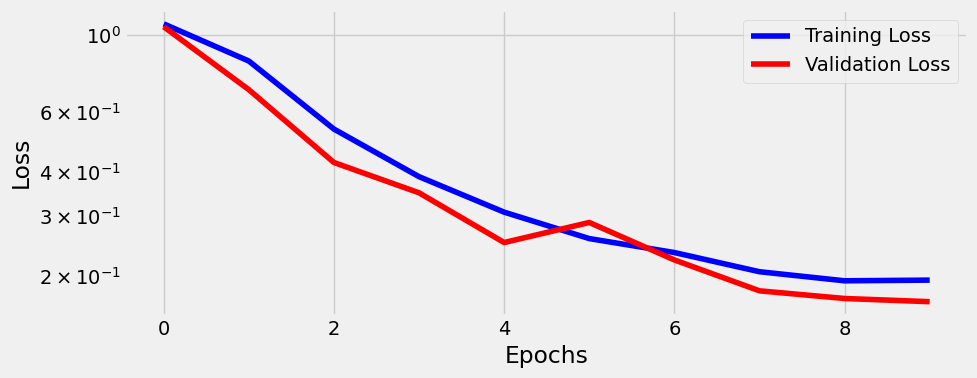

In [ ]:
fig = sbs_cnn3.plot_losses()

In [ ]:
print(StepByStep.loader_apply(train_loader, sbs_cnn3.correct).sum(axis=0),
      StepByStep.loader_apply(val_loader, sbs_cnn3.correct).sum(axis=0))

tensor([2506, 2520]) tensor([347, 372])
